In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [13]:
train_df = pd.read_csv("../input/train_2016_v2.csv", parse_dates=["transactiondate"])
train_df.shape

(90275, 3)

In [14]:
prop_df = pd.read_csv("../input/properties_2016.csv")
prop_df.shape

(2985217, 58)

In [15]:
train_df = pd.merge(train_df, prop_df, on='parcelid', how='left')
train_df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,468.0,NaN,NaN,33668120.0,-117677556.0,3643.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,6.059052e+07,32380.0,1286.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,NaN,839.0,839.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33755800.0,-118309000.0,70859.0,NaN,NaN,NaN,NaN,NaN,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,NaN,2283.0,2283.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,598.0,NaN,NaN,33485643.0,-117700234.0,6000.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,NaN,96961.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [71]:
dtype_df_train = train_df.dtypes.reset_index()
dtype_df_train.columns = ["Count", "Column Type"]
dtype_df_train

,Count,Column Type
0,parcelid,int64
1,logerror,float64
2,transactiondate,datetime64[ns]
3,airconditioningtypeid,float64
4,architecturalstyletypeid,float64
5,basementsqft,float64
6,bathroomcnt,float64
7,bedroomcnt,float64
8,buildingclasstypeid,float64
9,buildingqualitytypeid,float64


In [78]:
dtype_df_prop = prop_df.dtypes.reset_index()
dtype_df_prop.columns = ["Count", "Column Type"]
dtype_df_prop

,Count,Column Type
0,parcelid,int64
1,airconditioningtypeid,float64
2,architecturalstyletypeid,float64
3,basementsqft,float64
4,bathroomcnt,float64
5,bedroomcnt,float64
6,buildingclasstypeid,float64
7,buildingqualitytypeid,float64
8,calculatedbathnbr,float64
9,decktypeid,float64


In [80]:
dtype_df_prop.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,1
1,float64,52
2,object,5


In [81]:
dtype_df_train.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,1
1,float64,53
2,datetime64[ns],1
3,object,5


In [77]:
train_df['propertycountylandusecode'].unique()

array(['0100', '1', '010C', '122', '1129', '34', '1128', '010E', '0104',
       '0101', '0200', '0700', '1111', '01DC', '010D', '1110', '0400',
       '012C', '010V', '1116', '01HC', '010G', '0300', '010F', '1117',
       '0103', '38', '1210', '0111', '010M', '96', '135', '0108', '1014',
       '1112', '0201', '0109', '1310', '010H', '1410', '1222', '1321',
       '1720', '1011', '1432', '0401', '0102', '012D', '73', '105', '0110',
       '100V', '0130', '8800', '0303', '0210', '1012', '1333', '0114',
       '01DD', '020G', '040A', '012E', '020M', '040V', '070D', '1200',
       '030G', '1722', '6050', '1421', '010', nan, '200', '0', '1420',
       '0131', '0301'], dtype=object)

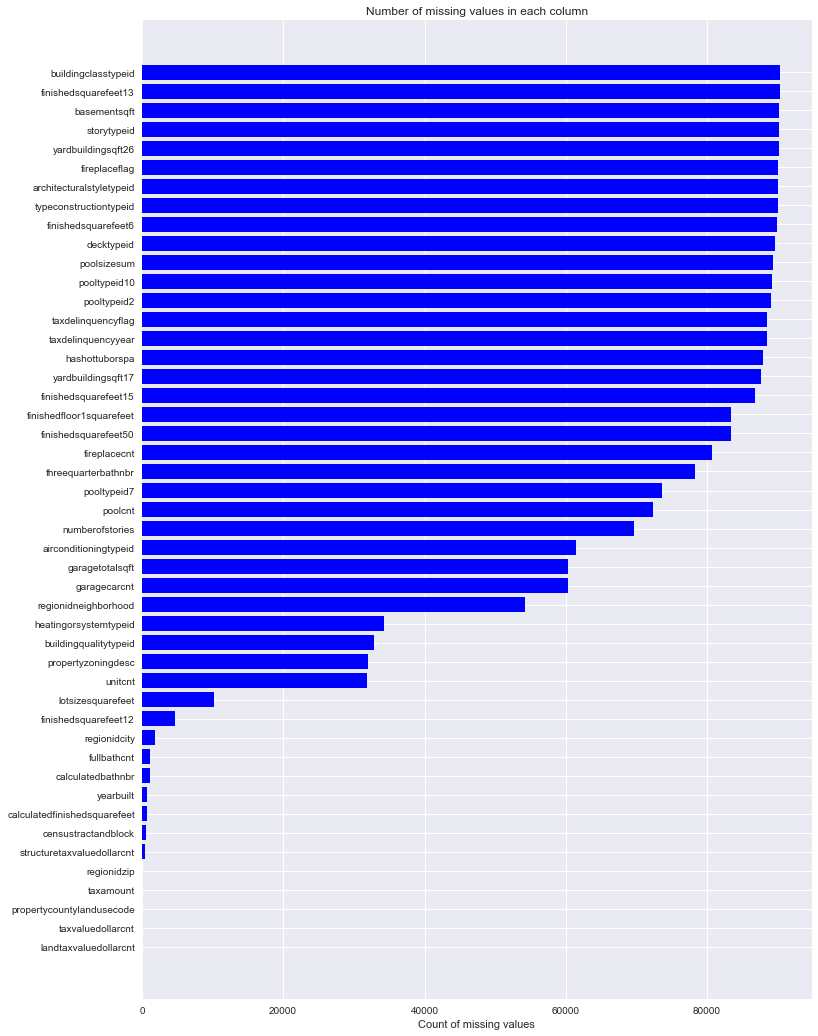

In [16]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [101]:
missing_train_df = train_df.isnull().sum(axis=0).reset_index()
missing_train_df.columns = ['column_name', 'count_train']
missing_train_df['ratio_train'] = missing_train_df['count_train'] / train_df.shape[0]
missing_train_df

,column_name,count_train,ratio_train
0,parcelid,0,0.000000
1,logerror,0,0.000000
2,transactiondate,0,0.000000
3,airconditioningtypeid,61494,0.681185
4,architecturalstyletypeid,90014,0.997109
5,basementsqft,90232,0.999524
6,bathroomcnt,0,0.000000
7,bedroomcnt,0,0.000000
8,buildingclasstypeid,90259,0.999823
9,buildingqualitytypeid,32911,0.364564


In [100]:
missing_prop_df = prop_df.isnull().sum(axis=0).reset_index()
missing_prop_df.columns = ['column_name', 'count_prop']
missing_prop_df['ratio_prop'] = missing_prop_df['count_prop'] / prop_df.shape[0]
missing_prop_df

,column_name,count_prop,ratio_prop
0,parcelid,0,0.000000
1,airconditioningtypeid,2173698,0.728154
2,architecturalstyletypeid,2979156,0.997970
3,basementsqft,2983589,0.999455
4,bathroomcnt,11462,0.003840
5,bedroomcnt,11450,0.003836
6,buildingclasstypeid,2972588,0.995769
7,buildingqualitytypeid,1046729,0.350637
8,calculatedbathnbr,128912,0.043183
9,decktypeid,2968121,0.994273


In [102]:
missing_merged = pd.merge(missing_train_df, missing_prop_df, on='column_name', how='left')
#missing_merged = missing_merged.drop(['parcelid','logerror','transactiondate'], axis=1)
missing_merged['Missing_Ratio_Diff'] = missing_merged['ratio_train'] - missing_merged['ratio_prop']
missing_merged

,column_name,count_train,ratio_train,count_prop,ratio_prop,Missing_Ratio_Diff
0,parcelid,0,0.000000,0.0,0.000000,0.000000
1,logerror,0,0.000000,NaN,NaN,NaN
2,transactiondate,0,0.000000,NaN,NaN,NaN
3,airconditioningtypeid,61494,0.681185,2173698.0,0.728154,-0.046969
4,architecturalstyletypeid,90014,0.997109,2979156.0,0.997970,-0.000861
5,basementsqft,90232,0.999524,2983589.0,0.999455,0.000069
6,bathroomcnt,0,0.000000,11462.0,0.003840,-0.003840
7,bedroomcnt,0,0.000000,11450.0,0.003836,-0.003836
8,buildingclasstypeid,90259,0.999823,2972588.0,0.995769,0.004053
9,buildingqualitytypeid,32911,0.364564,1046729.0,0.350637,0.013926


In [53]:
myList = train_df.columns
myList = myList.drop('parcelid')
myList = myList.drop('logerror')
myList = myList.drop('transactiondate')

In [52]:
train_df['transactiondate'].unique()

array(['2016-01-01T00:00:00.000000000', '2016-01-02T00:00:00.000000000',
       '2016-01-03T00:00:00.000000000', '2016-01-04T00:00:00.000000000',
       '2016-01-05T00:00:00.000000000', '2016-06-29T00:00:00.000000000',
       '2016-01-06T00:00:00.000000000', '2016-09-12T00:00:00.000000000',
       '2016-06-17T00:00:00.000000000', '2016-01-07T00:00:00.000000000',
       '2016-09-14T00:00:00.000000000', '2016-07-05T00:00:00.000000000',
       '2016-01-08T00:00:00.000000000', '2016-06-27T00:00:00.000000000',
       '2016-08-04T00:00:00.000000000', '2016-05-19T00:00:00.000000000',
       '2016-01-09T00:00:00.000000000', '2016-01-10T00:00:00.000000000',
       '2016-01-11T00:00:00.000000000', '2016-09-15T00:00:00.000000000',
       '2016-06-14T00:00:00.000000000', '2016-01-12T00:00:00.000000000',
       '2016-01-13T00:00:00.000000000', '2016-09-17T00:00:00.000000000',
       '2016-06-10T00:00:00.000000000', '2016-01-14T00:00:00.000000000',
       '2016-01-15T00:00:00.000000000', '2016-10-12

In [49]:
len(myList)

58

In [55]:
for myColumn in myList:
    print myColumn
    for kind in train_df[myColumn].unique():
        print kind,
        print train_df[train_df['airconditioningtypeid']==kind]['airconditioningtypeid'].count()

 airconditioningtypeid
1.0 26668
nan 0
5.0 215
13.0 1833
11.0 63
9.0 1
3.0 1
architecturalstyletypeid
nan 0
7.0 0
8.0 0
2.0 0
10.0 0
3.0 1
21.0 0
basementsqft
nan 0
814.0 0
330.0 0
168.0 0
671.0 0
1555.0 0
1528.0 0
771.0 0
700.0 0
831.0 0
1048.0 0
1312.0 0
690.0 0
564.0 0
198.0 0
676.0 0
184.0 0
540.0 0
260.0 0
557.0 0
312.0 0
913.0 0
1350.0 0
802.0 0
162.0 0
616.0 0
1551.0 0
485.0 0
238.0 0
493.0 0
760.0 0
515.0 0
196.0 0
585.0 0
234.0 0
510.0 0
579.0 0
100.0 0
608.0 0
1210.0 0
bathroomcnt
2.0 0
3.5 0
3.0 1
2.5 0
4.0 0
1.0 26668
5.0 215
5.5 0
1.5 0
8.0 0
0.0 0
4.5 0
9.0 1
7.0 0
6.0 0
10.0 0
6.5 0
7.5 0
12.0 0
11.0 63
20.0 0
8.5 0
15.0 0
bedroomcnt
3.0 1
4.0 0
2.0 0
5.0 215
1.0 26668
6.0 0
7.0 0
0.0 0
12.0 0
11.0 63
8.0 0
9.0 1
10.0 0
16.0 0
14.0 0
13.0 1833
15.0 0
buildingclasstypeid
nan 0
4.0 0
buildingqualitytypeid
4.0 0
nan 0
1.0 26668
7.0 0
12.0 0
10.0 0
8.0 0
6.0 0
11.0 63
calculatedbathnbr
2.0 0
3.5 0
3.0 1
2.5 0
4.0 0
1.0 26668
5.0 215
5.5 0
1.5 0
8.0 0
nan 0
4.5 0
9.0 1
7.0 0


1277.0 0
965.0 0
494.0 0
962.0 0
1359.0 0
1011.0 0
1059.0 0
1124.0 0
597.0 0
1237.0 0
2464.0 0
1952.0 0
1479.0 0
2649.0 0
1188.0 0
480.0 0
1711.0 0
1640.0 0
2318.0 0
927.0 0
4860.0 0
1459.0 0
126.0 0
1038.0 0
658.0 0
3126.0 0
1664.0 0
648.0 0
622.0 0
3737.0 0
1594.0 0
637.0 0
1446.0 0
1351.0 0
1950.0 0
1041.0 0
678.0 0
627.0 0
1370.0 0
708.0 0
2448.0 0
589.0 0
2090.0 0
2066.0 0
779.0 0
859.0 0
1752.0 0
2509.0 0
462.0 0
1787.0 0
573.0 0
495.0 0
1348.0 0
1027.0 0
761.0 0
1210.0 0
2530.0 0
1994.0 0
395.0 0
756.0 0
2068.0 0
1030.0 0
1443.0 0
2083.0 0
2223.0 0
1055.0 0
3741.0 0
1131.0 0
1442.0 0
1845.0 0
1435.0 0
1756.0 0
1025.0 0
564.0 0
1667.0 0
1171.0 0
4876.0 0
2261.0 0
1651.0 0
420.0 0
525.0 0
872.0 0
1123.0 0
508.0 0
696.0 0
1856.0 0
1858.0 0
1608.0 0
949.0 0
2817.0 0
2130.0 0
2366.0 0
1273.0 0
1314.0 0
2748.0 0
948.0 0
1561.0 0
1361.0 0
1136.0 0
4306.0 0
2619.0 0
4244.0 0
1255.0 0
3011.0 0
1918.0 0
2740.0 0
2260.0 0
1593.0 0
921.0 0
2404.0 0
792.0 0
517.0 0
2418.0 0
2928.0 0
2279.0 0

3843.0 0
1073.0 0
1721.0 0
3683.0 0
464.0 0
446.0 0
3692.0 0
2137.0 0
3722.0 0
1911.0 0
4240.0 0
2628.0 0
1472.0 0
2073.0 0
831.0 0
2533.0 0
1028.0 0
2484.0 0
978.0 0
2517.0 0
2443.0 0
881.0 0
557.0 0
819.0 0
2288.0 0
1774.0 0
calculatedfinishedsquarefeet
1684.0 0
2263.0 0
2217.0 0
839.0 0
2283.0 0
3067.0 0
1297.0 0
1763.0 0
796.0 0
1260.0 0
1417.0 0
3080.0 0
1484.0 0
1249.0 0
1367.0 0
1302.0 0
1558.0 0
597.0 0
1321.0 0
1727.0 0
840.0 0
1476.0 0
1430.0 0
3749.0 0
1213.0 0
1875.0 0
1858.0 0
1045.0 0
1329.0 0
1144.0 0
1422.0 0
1631.0 0
1782.0 0
1847.0 0
1420.0 0
1202.0 0
2319.0 0
640.0 0
1431.0 0
2580.0 0
1540.0 0
1963.0 0
1150.0 0
1457.0 0
2401.0 0
3623.0 0
4537.0 0
1250.0 0
2054.0 0
1164.0 0
2590.0 0
1362.0 0
1381.0 0
5516.0 0
1137.0 0
3088.0 0
1808.0 0
1084.0 0
991.0 0
1445.0 0
2497.0 0
1110.0 0
1537.0 0
1344.0 0
2044.0 0
1206.0 0
1591.0 0
1426.0 0
1973.0 0
2399.0 0
1536.0 0
2036.0 0
956.0 0
1694.0 0
1324.0 0
1114.0 0
2357.0 0
2501.0 0
937.0 0
1327.0 0
1818.0 0
2026.0 0
1368.0 0
1506.

1157.0 0
1518.0 0
1984.0 0
2803.0 0
862.0 0
2523.0 0
2811.0 0
2412.0 0
2560.0 0
2102.0 0
1028.0 0
4439.0 0
805.0 0
698.0 0
820.0 0
3562.0 0
1035.0 0
1514.0 0
2678.0 0
2049.0 0
1138.0 0
2476.0 0
954.0 0
2754.0 0
963.0 0
4003.0 0
3266.0 0
1009.0 0
904.0 0
1316.0 0
2765.0 0
1503.0 0
1914.0 0
1912.0 0
1052.0 0
2920.0 0
1488.0 0
1930.0 0
1271.0 0
567.0 0
2302.0 0
4223.0 0
867.0 0
4119.0 0
547.0 0
1566.0 0
2458.0 0
2692.0 0
1693.0 0
1391.0 0
1983.0 0
2844.0 0
859.0 0
4317.0 0
2264.0 0
1070.0 0
2255.0 0
10475.0 0
3849.0 0
1156.0 0
1042.0 0
1275.0 0
2141.0 0
1883.0 0
652.0 0
2282.0 0
1928.0 0
3873.0 0
1071.0 0
1948.0 0
2020.0 0
8936.0 0
1718.0 0
2467.0 0
612.0 0
1307.0 0
697.0 0
1328.0 0
431.0 0
1898.0 0
1181.0 0
853.0 0
1234.0 0
1557.0 0
1749.0 0
1279.0 0
2517.0 0
1293.0 0
3640.0 0
1748.0 0
711.0 0
1403.0 0
2876.0 0
950.0 0
1100.0 0
3251.0 0
817.0 0
671.0 0
1257.0 0
572.0 0
2113.0 0
600.0 0
1533.0 0
1528.0 0
2231.0 0
1688.0 0
2097.0 0
1882.0 0
1971.0 0
1508.0 0
765.0 0
1768.0 0
6610.0 0
1207.

2725.0 0
688.0 0
818.0 0
946.0 0
1896.0 0
4069.0 0
1804.0 0
3363.0 0
2161.0 0
2293.0 0
4184.0 0
3816.0 0
2331.0 0
2898.0 0
632.0 0
1027.0 0
4474.0 0
7423.0 0
1996.0 0
793.0 0
2611.0 0
2096.0 0
713.0 0
1323.0 0
5336.0 0
3010.0 0
5224.0 0
1864.0 0
3878.0 0
2915.0 0
1136.0 0
3066.0 0
3124.0 0
582.0 0
1621.0 0
2598.0 0
3225.0 0
1683.0 0
2877.0 0
2541.0 0
886.0 0
901.0 0
890.0 0
14699.0 0
6343.0 0
2446.0 0
4521.0 0
967.0 0
4246.0 0
2812.0 0
759.0 0
2085.0 0
2473.0 0
2180.0 0
863.0 0
2368.0 0
2455.0 0
852.0 0
1954.0 0
5654.0 0
3488.0 0
1046.0 0
3696.0 0
1074.0 0
4166.0 0
3001.0 0
3360.0 0
2174.0 0
1723.0 0
3584.0 0
514.0 0
481.0 0
1632.0 0
1544.0 0
1236.0 0
2430.0 0
3940.0 0
1182.0 0
2542.0 0
3260.0 0
6773.0 0
1736.0 0
868.0 0
1960.0 0
2091.0 0
3199.0 0
516.0 0
4311.0 0
3294.0 0
2880.0 0
3509.0 0
3570.0 0
4396.0 0
2798.0 0
996.0 0
1585.0 0
3556.0 0
3172.0 0
983.0 0
1301.0 0
2361.0 0
3613.0 0
3393.0 0
2888.0 0
3514.0 0
2137.0 0
1478.0 0
897.0 0
2244.0 0
883.0 0
2756.0 0
2956.0 0
1851.0 0
1394

3808.0 0
5838.0 0
3667.0 0
2649.0 0
3819.0 0
2596.0 0
3781.0 0
2871.0 0
2986.0 0
4353.0 0
3950.0 0
598.0 0
661.0 0
2904.0 0
3039.0 0
5540.0 0
3837.0 0
831.0 0
2551.0 0
2987.0 0
8573.0 0
4085.0 0
3204.0 0
2910.0 0
2645.0 0
1619.0 0
2683.0 0
358.0 0
5734.0 0
2608.0 0
3219.0 0
595.0 0
4014.0 0
320.0 0
3044.0 0
738.0 0
1133.0 0
4824.0 0
462.0 0
3603.0 0
6092.0 0
2971.0 0
3982.0 0
5021.0 0
5311.0 0
2906.0 0
5206.0 0
1903.0 0
692.0 0
911.0 0
5300.0 0
4042.0 0
5310.0 0
3783.0 0
4458.0 0
3441.0 0
3760.0 0
2662.0 0
646.0 0
3468.0 0
6507.0 0
8427.0 0
4512.0 0
3329.0 0
3061.0 0
5934.0 0
4438.0 0
2219.0 0
2342.0 0
2133.0 0
4454.0 0
3051.0 0
3926.0 0
2115.0 0
2624.0 0
3550.0 0
2295.0 0
3247.0 0
3068.0 0
407.0 0
2912.0 0
3049.0 0
2717.0 0
1461.0 0
3265.0 0
625.0 0
531.0 0
4021.0 0
492.0 0
3840.0 0
3188.0 0
7099.0 0
2234.0 0
3191.0 0
4082.0 0
4173.0 0
5133.0 0
3038.0 0
2194.0 0
7444.0 0
4616.0 0
4077.0 0
3445.0 0
3195.0 0
2151.0 0
1717.0 0
5704.0 0
940.0 0
457.0 0
5380.0 0
5008.0 0
3345.0 0
5679.0 0


4776.0 0
525.0 0
739.0 0
3915.0 0
3643.0 0
3981.0 0
5111.0 0
10132.0 0
512.0 0
5484.0 0
4253.0 0
537.0 0
3774.0 0
3579.0 0
3566.0 0
3591.0 0
3589.0 0
3980.0 0
6874.0 0
3726.0 0
4335.0 0
4460.0 0
2350.0 0
3862.0 0
4393.0 0
7164.0 0
7226.0 0
13352.0 0
120.0 0
3979.0 0
5436.0 0
3851.0 0
4332.0 0
2851.0 0
4343.0 0
4009.0 0
3311.0 0
6187.0 0
3676.0 0
3273.0 0
4263.0 0
3577.0 0
7047.0 0
4267.0 0
4204.0 0
2491.0 0
3814.0 0
3512.0 0
558.0 0
4578.0 0
6623.0 0
12732.0 0
3043.0 0
3541.0 0
3457.0 0
5564.0 0
7949.0 0
3671.0 0
3297.0 0
609.0 0
587.0 0
5701.0 0
4961.0 0
4074.0 0
4850.0 0
3052.0 0
7121.0 0
5584.0 0
4342.0 0
2789.0 0
3620.0 0
5135.0 0
6127.0 0
3005.0 0
4238.0 0
280.0 0
4128.0 0
7499.0 0
5438.0 0
4457.0 0
5160.0 0
3898.0 0
3806.0 0
4792.0 0
4305.0 0
3146.0 0
2485.0 0
7460.0 0
4160.0 0
4120.0 0
494.0 0
7471.0 0
5044.0 0
4032.0 0
5144.0 0
4452.0 0
2771.0 0
2367.0 0
3832.0 0
5414.0 0
702.0 0
6529.0 0
473.0 0
658.0 0
2946.0 0
3672.0 0
11811.0 0
4487.0 0
5376.0 0
4159.0 0
3008.0 0
3105.0 0
3

3099.0 0
4299.0 0
3413.0 0
5005.0 0
3887.0 0
4954.0 0
4017.0 0
4675.0 0
4803.0 0
3890.0 0
4615.0 0
5538.0 0
4916.0 0
5817.0 0
3193.0 0
13148.0 0
6175.0 0
6647.0 0
5722.0 0
585.0 0
4451.0 0
7150.0 0
4139.0 0
11038.0 0
5872.0 0
6418.0 0
5016.0 0
3429.0 0
460.0 0
5087.0 0
12851.0 0
4067.0 0
6273.0 0
6560.0 0
3668.0 0
5256.0 0
7111.0 0
4935.0 0
5559.0 0
3647.0 0
4150.0 0
5660.0 0
5883.0 0
4504.0 0
6198.0 0
4806.0 0
4971.0 0
5494.0 0
4520.0 0
4325.0 0
319.0 0
439.0 0
6110.0 0
5468.0 0
6135.0 0
6167.0 0
5594.0 0
4252.0 0
6849.0 0
5076.0 0
5976.0 0
7454.0 0
559.0 0
5383.0 0
4987.0 0
5493.0 0
4733.0 0
4939.0 0
5337.0 0
3825.0 0
6615.0 0
4541.0 0
160.0 0
513.0 0
4910.0 0
4804.0 0
464.0 0
4933.0 0
4443.0 0
4582.0 0
9166.0 0
4848.0 0
5248.0 0
5552.0 0
7204.0 0
5842.0 0
4347.0 0
476.0 0
6600.0 0
332.0 0
4403.0 0
8480.0 0
3803.0 0
4963.0 0
6395.0 0
5999.0 0
10111.0 0
7230.0 0
3829.0 0
8364.0 0
5109.0 0
5060.0 0
4172.0 0
3903.0 0
8127.0 0
5279.0 0
466.0 0
5207.0 0
4338.0 0
20013.0 0
4782.0 0
7397.0 

1034.0 0
2037.0 0
2212.0 0
2123.0 0
3028.0 0
1841.0 0
2452.0 0
1871.0 0
2954.0 0
1415.0 0
1707.0 0
2449.0 0
1396.0 0
1493.0 0
944.0 0
2299.0 0
1596.0 0
1534.0 0
3259.0 0
1511.0 0
834.0 0
1159.0 0
690.0 0
1411.0 0
1831.0 0
1252.0 0
1789.0 0
1724.0 0
663.0 0
1554.0 0
1134.0 0
809.0 0
1385.0 0
1594.0 0
1490.0 0
780.0 0
2699.0 0
988.0 0
2107.0 0
1886.0 0
3767.0 0
3368.0 0
2614.0 0
1211.0 0
4221.0 0
2767.0 0
1998.0 0
734.0 0
2071.0 0
1680.0 0
2040.0 0
1626.0 0
2838.0 0
916.0 0
1388.0 0
1025.0 0
2296.0 0
3111.0 0
1245.0 0
790.0 0
3458.0 0
902.0 0
908.0 0
1850.0 0
1091.0 0
1628.0 0
1761.0 0
1384.0 0
1447.0 0
882.0 0
2892.0 0
1953.0 0
3354.0 0
2477.0 0
1741.0 0
824.0 0
2411.0 0
1375.0 0
2083.0 0
1157.0 0
1518.0 0
1984.0 0
2803.0 0
862.0 0
2523.0 0
2811.0 0
2412.0 0
2560.0 0
2102.0 0
1028.0 0
4439.0 0
805.0 0
698.0 0
820.0 0
3562.0 0
1035.0 0
1514.0 0
2678.0 0
2049.0 0
1138.0 0
954.0 0
2754.0 0
963.0 0
4003.0 0
3266.0 0
1009.0 0
904.0 0
1316.0 0
2765.0 0
1503.0 0
1914.0 0
1912.0 0
1052.0 0
2920

679.0 0
999.0 0
2424.0 0
2450.0 0
2718.0 0
2544.0 0
2633.0 0
1945.0 0
2086.0 0
1413.0 0
2882.0 0
1750.0 0
2936.0 0
2905.0 0
2663.0 0
3090.0 0
2725.0 0
688.0 0
818.0 0
2848.0 0
946.0 0
1896.0 0
4069.0 0
1804.0 0
3363.0 0
2161.0 0
2293.0 0
1462.0 0
3816.0 0
2331.0 0
2898.0 0
632.0 0
1027.0 0
4474.0 0
7423.0 0
1996.0 0
793.0 0
2611.0 0
2096.0 0
713.0 0
1323.0 0
5336.0 0
3010.0 0
5224.0 0
1864.0 0
2808.0 0
3878.0 0
2915.0 0
1136.0 0
3066.0 0
3124.0 0
582.0 0
1621.0 0
2598.0 0
1824.0 0
1683.0 0
2877.0 0
2541.0 0
886.0 0
901.0 0
890.0 0
14699.0 0
6343.0 0
3060.0 0
2446.0 0
967.0 0
4246.0 0
759.0 0
2085.0 0
2473.0 0
2180.0 0
863.0 0
2368.0 0
2455.0 0
852.0 0
1954.0 0
5654.0 0
3488.0 0
1046.0 0
3696.0 0
2256.0 0
1074.0 0
4166.0 0
3001.0 0
2174.0 0
1723.0 0
3584.0 0
514.0 0
481.0 0
1632.0 0
1544.0 0
1236.0 0
2430.0 0
2055.0 0
3940.0 0
1182.0 0
2542.0 0
3260.0 0
6773.0 0
1736.0 0
868.0 0
1960.0 0
2091.0 0
3199.0 0
516.0 0
4311.0 0
3294.0 0
2880.0 0
3570.0 0
4396.0 0
2798.0 0
1585.0 0
3556.0 0
31

3068.0 0
407.0 0
2912.0 0
3049.0 0
2717.0 0
1461.0 0
3265.0 0
625.0 0
531.0 0
4021.0 0
492.0 0
3188.0 0
7099.0 0
2234.0 0
3191.0 0
4082.0 0
4173.0 0
3038.0 0
4616.0 0
4077.0 0
3445.0 0
3195.0 0
2151.0 0
1717.0 0
5704.0 0
940.0 0
457.0 0
5380.0 0
5008.0 0
3345.0 0
5679.0 0
4361.0 0
3919.0 0
5273.0 0
2787.0 0
2952.0 0
3000.0 0
1885.0 0
921.0 0
2053.0 0
5038.0 0
2874.0 0
2993.0 0
5592.0 0
4766.0 0
509.0 0
2128.0 0
2770.0 0
7546.0 0
4627.0 0
561.0 0
6813.0 0
2982.0 0
4663.0 0
3027.0 0
3215.0 0
7640.0 0
4099.0 0
1817.0 0
2826.0 0
2099.0 0
3809.0 0
695.0 0
8586.0 0
2359.0 0
2929.0 0
4104.0 0
3383.0 0
599.0 0
3386.0 0
4510.0 0
1065.0 0
3412.0 0
736.0 0
2429.0 0
4029.0 0
2065.0 0
2736.0 0
2572.0 0
7210.0 0
2959.0 0
4738.0 0
851.0 0
2873.0 0
4682.0 0
2480.0 0
4250.0 0
4648.0 0
4397.0 0
1771.0 0
4307.0 0
3990.0 0
4197.0 0
474.0 0
2793.0 0
4389.0 0
396.0 0
4164.0 0
3114.0 0
3186.0 0
6257.0 0
2284.0 0
3509.0 0
4052.0 0
3489.0 0
2763.0 0
3055.0 0
3856.0 0
7769.0 0
3703.0 0
2729.0 0
3159.0 0
506.0 0

7359.0 0
324.0 0
3688.0 0
5455.0 0
5237.0 0
7136.0 0
5537.0 0
3424.0 0
5675.0 0
2571.0 0
3161.0 0
4546.0 0
4113.0 0
3885.0 0
5764.0 0
3766.0 0
4581.0 0
4157.0 0
7712.0 0
2723.0 0
4097.0 0
3349.0 0
3843.0 0
4656.0 0
3645.0 0
5791.0 0
2967.0 0
4444.0 0
536.0 0
7097.0 0
3706.0 0
8088.0 0
7778.0 0
3911.0 0
4318.0 0
4293.0 0
563.0 0
641.0 0
4008.0 0
3845.0 0
4636.0 0
4697.0 0
7229.0 0
4255.0 0
5736.0 0
4286.0 0
6097.0 0
2574.0 0
8220.0 0
5605.0 0
5854.0 0
3607.0 0
5324.0 0
8020.0 0
3712.0 0
3966.0 0
8069.0 0
3533.0 0
4076.0 0
5201.0 0
4297.0 0
4778.0 0
4694.0 0
3844.0 0
4943.0 0
3277.0 0
4073.0 0
3972.0 0
7666.0 0
3365.0 0
7024.0 0
2975.0 0
4421.0 0
769.0 0
4669.0 0
589.0 0
4102.0 0
4653.0 0
6576.0 0
3418.0 0
3681.0 0
4329.0 0
5039.0 0
3414.0 0
8278.0 0
4717.0 0
3937.0 0
3771.0 0
7857.0 0
3725.0 0
3262.0 0
4493.0 0
3376.0 0
4915.0 0
5302.0 0
2801.0 0
4124.0 0
6171.0 0
458.0 0
3848.0 0
5294.0 0
5264.0 0
3158.0 0
5753.0 0
5278.0 0
4290.0 0
5992.0 0
3599.0 0
6252.0 0
377.0 0
3436.0 0
3568.0 0


5383.0 0
4987.0 0
5493.0 0
4733.0 0
4939.0 0
3825.0 0
6615.0 0
160.0 0
513.0 0
4804.0 0
464.0 0
4933.0 0
4910.0 0
4443.0 0
4582.0 0
9166.0 0
4848.0 0
5248.0 0
5552.0 0
7204.0 0
5842.0 0
4347.0 0
476.0 0
6600.0 0
332.0 0
4403.0 0
8480.0 0
3803.0 0
6395.0 0
5999.0 0
5035.0 0
10111.0 0
3829.0 0
8364.0 0
5109.0 0
5060.0 0
4172.0 0
3836.0 0
8127.0 0
5279.0 0
466.0 0
5207.0 0
4338.0 0
20013.0 0
7397.0 0
5921.0 0
484.0 0
3865.0 0
5394.0 0
562.0 0
5710.0 0
7556.0 0
4334.0 0
6234.0 0
8163.0 0
230.0 0
4914.0 0
3970.0 0
5313.0 0
4912.0 0
7970.0 0
5556.0 0
6818.0 0
499.0 0
5555.0 0
4363.0 0
5500.0 0
4737.0 0
5663.0 0
5517.0 0
5902.0 0
5463.0 0
5472.0 0
5012.0 0
4746.0 0
4716.0 0
4450.0 0
3450.0 0
4699.0 0
7985.0 0
5309.0 0
4416.0 0
7039.0 0
6802.0 0
5332.0 0
4437.0 0
9467.0 0
8164.0 0
6996.0 0
3859.0 0
3758.0 0
10681.0 0
10014.0 0
finishedsquarefeet13
nan 0
1392.0 0
1440.0 0
1536.0 0
1344.0 0
1566.0 0
1464.0 0
1152.0 0
1584.0 0
1248.0 0
1416.0 0
1056.0 0
finishedsquarefeet15
nan 0
3088.0 0
3871.0 

1639.0 0
1098.0 0
1342.0 0
1602.0 0
3726.0 0
1934.0 0
4616.0 0
1915.0 0
4166.0 0
2107.0 0
2989.0 0
1697.0 0
2353.0 0
2674.0 0
2773.0 0
4100.0 0
4009.0 0
1464.0 0
2345.0 0
2916.0 0
1652.0 0
2308.0 0
3014.0 0
1038.0 0
2732.0 0
3714.0 0
2981.0 0
2221.0 0
3872.0 0
560.0 0
3814.0 0
2389.0 0
2372.0 0
3990.0 0
1582.0 0
1758.0 0
5564.0 0
1908.0 0
2728.0 0
1268.0 0
3613.0 0
1577.0 0
1837.0 0
1707.0 0
2575.0 0
2559.0 0
2145.0 0
1591.0 0
2333.0 0
960.0 0
1506.0 0
1892.0 0
4792.0 0
1534.0 0
1523.0 0
2416.0 0
2420.0 0
3146.0 0
3834.0 0
1385.0 0
1963.0 0
1170.0 0
1148.0 0
5414.0 0
2480.0 0
1600.0 0
3931.0 0
2875.0 0
2720.0 0
1376.0 0
4114.0 0
1996.0 0
2814.0 0
1520.0 0
1586.0 0
5764.0 0
3180.0 0
2760.0 0
1619.0 0
1462.0 0
3205.0 0
2847.0 0
3331.0 0
3162.0 0
1710.0 0
5071.0 0
1002.0 0
1864.0 0
1542.0 0
2384.0 0
973.0 0
3037.0 0
1076.0 0
4742.0 0
1158.0 0
3478.0 0
2921.0 0
3348.0 0
1217.0 0
2710.0 0
3038.0 0
2451.0 0
1033.0 0
3203.0 0
1957.0 0
1730.0 0
2079.0 0
1929.0 0
3040.0 0
4308.0 0
1635.0 0
2017

905.0 0
1169.0 0
518.0 0
2062.0 0
1625.0 0
1051.0 0
814.0 0
934.0 0
1424.0 0
2179.0 0
1206.0 0
1300.0 0
1428.0 0
1190.0 0
1352.0 0
1986.0 0
754.0 0
871.0 0
1685.0 0
1012.0 0
510.0 0
1548.0 0
551.0 0
2304.0 0
1218.0 0
117.0 0
1014.0 0
1674.0 0
3100.0 0
1346.0 0
1500.0 0
1498.0 0
1580.0 0
1197.0 0
522.0 0
2119.0 0
2205.0 0
1961.0 0
1416.0 0
1907.0 0
741.0 0
1216.0 0
1066.0 0
1082.0 0
109.0 0
1146.0 0
619.0 0
2000.0 0
1244.0 0
1461.0 0
1820.0 0
1447.0 0
1741.0 0
1534.0 0
1208.0 0
1385.0 0
963.0 0
2234.0 0
1742.0 0
1526.0 0
1280.0 0
1431.0 0
1065.0 0
1144.0 0
1150.0 0
671.0 0
1137.0 0
1196.0 0
1085.0 0
1849.0 0
1908.0 0
1054.0 0
2264.0 0
1672.0 0
691.0 0
587.0 0
3060.0 0
1383.0 0
1121.0 0
1232.0 0
1826.0 0
2356.0 0
1794.0 0
1511.0 0
570.0 0
1566.0 0
1554.0 0
1209.0 0
1211.0 0
960.0 0
1709.0 0
1520.0 0
271.0 0
991.0 0
2040.0 0
1434.0 0
1613.0 0
912.0 0
1768.0 0
1022.0 0
478.0 0
2024.0 0
1939.0 0
840.0 0
2991.0 0
1227.0 0
710.0 0
1233.0 0
1840.0 0
1199.0 0
973.0 0
1110.0 0
561.0 0
195.0 0
60

528.0 0
568.0 0
560.0 0
1475.0 0
749.0 0
1936.0 0
2605.0 0
1784.0 0
2382.0 0
1105.0 0
1010.0 0
972.0 0
1454.0 0
1733.0 0
1518.0 0
2334.0 0
736.0 0
762.0 0
1097.0 0
983.0 0
1611.0 0
994.0 0
3476.0 0
687.0 0
1158.0 0
496.0 0
2889.0 0
1111.0 0
672.0 0
96.0 0
1536.0 0
673.0 0
766.0 0
1155.0 0
1391.0 0
1719.0 0
1462.0 0
1860.0 0
571.0 0
3253.0 0
1641.0 0
1039.0 0
1291.0 0
1655.0 0
1562.0 0
1808.0 0
1773.0 0
2233.0 0
1289.0 0
601.0 0
2549.0 0
3872.0 0
2098.0 0
1147.0 0
1746.0 0
917.0 0
2798.0 0
1231.0 0
1225.0 0
1522.0 0
2623.0 0
1417.0 0
782.0 0
787.0 0
3821.0 0
574.0 0
3833.0 0
1687.0 0
1381.0 0
1806.0 0
1620.0 0
1031.0 0
1564.0 0
2170.0 0
1769.0 0
914.0 0
731.0 0
1638.0 0
1827.0 0
1684.0 0
2350.0 0
3118.0 0
2038.0 0
2902.0 0
1988.0 0
1577.0 0
1224.0 0
2942.0 0
2854.0 0
4373.0 0
1156.0 0
2696.0 0
1139.0 0
1815.0 0
1033.0 0
2048.0 0
1140.0 0
3128.0 0
1579.0 0
1229.0 0
1270.0 0
2116.0 0
1829.0 0
2420.0 0
975.0 0
689.0 0
2932.0 0
1092.0 0
2584.0 0
1457.0 0
1240.0 0
1440.0 0
5181.0 0
857.0 0
3

1654.0 0
765.0 0
842.0 0
1679.0 0
1541.0 0
960.0 0
1000.0 0
1092.0 0
2530.0 0
854.0 0
2498.0 0
2628.0 0
1776.0 0
736.0 0
3565.0 0
2191.0 0
686.0 0
988.0 0
952.0 0
820.0 0
1517.0 0
3933.0 0
1670.0 0
360.0 0
3240.0 0
3234.0 0
1484.0 0
1777.0 0
972.0 0
4895.0 0
1152.0 0
2585.0 0
2339.0 0
1135.0 0
4788.0 0
1216.0 0
2293.0 0
3462.0 0
5287.0 0
4302.0 0
980.0 0
3845.0 0
931.0 0
944.0 0
1290.0 0
1416.0 0
1430.0 0
2172.0 0
1629.0 0
844.0 0
684.0 0
2630.0 0
873.0 0
2052.0 0
2743.0 0
3470.0 0
2048.0 0
700.0 0
3886.0 0
3368.0 0
1591.0 0
1224.0 0
3055.0 0
2537.0 0
935.0 0
722.0 0
1080.0 0
4967.0 0
1556.0 0
1228.0 0
3431.0 0
3163.0 0
1471.0 0
882.0 0
5229.0 0
1320.0 0
2460.0 0
572.0 0
1904.0 0
2662.0 0
4553.0 0
2517.0 0
300.0 0
4303.0 0
1248.0 0
2260.0 0
1820.0 0
2686.0 0
991.0 0
3300.0 0
1593.0 0
2323.0 0
4452.0 0
1553.0 0
899.0 0
4869.0 0
2428.0 0
1926.0 0
3388.0 0
800.0 0
1879.0 0
1106.0 0
728.0 0
3004.0 0
1794.0 0
1674.0 0
1835.0 0
3164.0 0
3986.0 0
4380.0 0
3844.0 0
1847.0 0
3515.0 0
783.0 0
46

883.0 0
807.0 0
869.0 0
1380.0 0
832.0 0
910.0 0
2206.0 0
711.0 0
4048.0 0
311.0 0
1002.0 0
786.0 0
751.0 0
1354.0 0
2685.0 0
729.0 0
296.0 0
983.0 0
359.0 0
803.0 0
874.0 0
770.0 0
1234.0 0
857.0 0
211.0 0
1111.0 0
334.0 0
1054.0 0
836.0 0
913.0 0
364.0 0
158.0 0
999.0 0
963.0 0
755.0 0
778.0 0
2446.0 0
829.0 0
2140.0 0
861.0 0
1225.0 0
258.0 0
865.0 0
1284.0 0
1264.0 0
777.0 0
1017.0 0
925.0 0
871.0 0
822.0 0
4384.0 0
207.0 0
1790.0 0
908.0 0
992.0 0
1296.0 0
928.0 0
1533.0 0
769.0 0
1104.0 0
395.0 0
1686.0 0
794.0 0
1098.0 0
731.0 0
241.0 0
839.0 0
346.0 0
888.0 0
945.0 0
269.0 0
1194.0 0
286.0 0
1896.0 0
1500.0 0
978.0 0
959.0 0
1138.0 0
892.0 0
1004.0 0
126.0 0
1831.0 0
2441.0 0
1932.0 0
265.0 0
292.0 0
1120.0 0
2777.0 0
813.0 0
1035.0 0
2293.0 0
1410.0 0
946.0 0
1087.0 0
801.0 0
876.0 0
987.0 0
1046.0 0
1411.0 0
894.0 0
1845.0 0
1076.0 0
709.0 0
847.0 0
1080.0 0
1442.0 0
295.0 0
213.0 0
799.0 0
195.0 0
942.0 0
3348.0 0
1239.0 0
2011.0 0
348.0 0
368.0 0
1427.0 0
362.0 0
919.0 0
11

33863248.0 0
33781400.0 0
33772015.0 0
34404218.0 0
34123213.0 0
33974900.0 0
33910131.0 0
33857052.0 0
34166243.0 0
33838906.0 0
34084395.0 0
34083526.0 0
33981143.0 0
34133746.0 0
33813551.0 0
33901867.0 0
34129714.0 0
34112638.0 0
33600453.0 0
33971739.0 0
33967191.0 0
34040300.0 0
34695207.0 0
34166800.0 0
34265219.0 0
34436122.0 0
33612400.0 0
34192345.0 0
33872242.0 0
33618830.0 0
33661152.0 0
33768400.0 0
34170448.0 0
33756502.0 0
34268507.0 0
33965290.0 0
33625445.0 0
33765900.0 0
33923600.0 0
33956560.0 0
34042803.0 0
33963337.0 0
34602875.0 0
34031445.0 0
34092100.0 0
33786257.0 0
34151460.0 0
33771600.0 0
34031506.0 0
34318400.0 0
34162188.0 0
34564947.0 0
33833289.0 0
34094520.0 0
34268311.0 0
33838961.0 0
34026818.0 0
33662025.0 0
34679628.0 0
34086250.0 0
34280223.0 0
34401200.0 0
34201033.0 0
33724869.0 0
33954200.0 0
34594598.0 0
33985734.0 0
33912556.0 0
33987102.0 0
33757950.0 0
34213286.0 0
33900312.0 0
34041508.0 0
34132000.0 0
34149247.0 0
33600258.0 0
33890984.0 0

34117492.0 0
33523771.0 0
33878096.0 0
34207471.0 0
33628475.0 0
33973004.0 0
34093238.0 0
34211713.0 0
33881306.0 0
34228089.0 0
34129741.0 0
34150700.0 0
33614451.0 0
34197931.0 0
34107400.0 0
34178730.0 0
34220413.0 0
34213078.0 0
34675860.0 0
34243834.0 0
34425878.0 0
34130650.0 0
34014433.0 0
33993512.0 0
33828365.0 0
34041366.0 0
34129429.0 0
34169868.0 0
33914284.0 0
33464100.0 0
34066866.0 0
34260600.0 0
34193028.0 0
33836264.0 0
34464968.0 0
34155538.0 0
34610065.0 0
34413300.0 0
34222348.0 0
33882291.0 0
34667466.0 0
33756869.0 0
34148600.0 0
34028064.0 0
33922293.0 0
33851921.0 0
33886648.0 0
34049049.0 0
33947018.0 0
34223017.0 0
33601749.0 0
34292136.0 0
33850797.0 0
33908886.0 0
33840259.0 0
33636507.0 0
33761331.0 0
34140000.0 0
33909130.0 0
34049456.0 0
33763500.0 0
34099737.0 0
33643369.0 0
33847032.0 0
34091498.0 0
34023915.0 0
34043500.0 0
34556200.0 0
34270181.0 0
33748098.0 0
33727431.0 0
33719588.0 0
33610002.0 0
33946747.0 0
34035800.0 0
34074076.0 0
34046600.0 0

33898300.0 0
34159233.0 0
34241797.0 0
33813400.0 0
34147672.0 0
34175699.0 0
34679177.0 0
33718780.0 0
33868953.0 0
34165706.0 0
34220367.0 0
33464895.0 0
34054441.0 0
34048818.0 0
34396984.0 0
34086789.0 0
34063725.0 0
33756700.0 0
33799837.0 0
33906574.0 0
33903257.0 0
33760921.0 0
33477227.0 0
34374365.0 0
33908700.0 0
33595508.0 0
33974954.0 0
34056000.0 0
34144185.0 0
33988333.0 0
33838770.0 0
34150000.0 0
34247300.0 0
34118039.0 0
34006314.0 0
33827895.0 0
34041500.0 0
34169200.0 0
34207957.0 0
33962542.0 0
34152004.0 0
34327082.0 0
34243393.0 0
33764127.0 0
33615100.0 0
34109653.0 0
34441978.0 0
34218045.0 0
33826607.0 0
34223990.0 0
33765362.0 0
33508402.0 0
34218224.0 0
33534318.0 0
34614505.0 0
34089506.0 0
33824700.0 0
34085724.0 0
34037163.0 0
34225667.0 0
34063878.0 0
33824631.0 0
33912386.0 0
33676078.0 0
34035375.0 0
33841552.0 0
34095487.0 0
34140452.0 0
33856366.0 0
34257000.0 0
34165100.0 0
34118588.0 0
34139033.0 0
33777857.0 0
34053400.0 0
33712602.0 0
33978512.0 0

33645863.0 0
34134903.0 0
34660665.0 0
34203095.0 0
34577258.0 0
34605544.0 0
34181784.0 0
34668631.0 0
34193340.0 0
33548573.0 0
34406642.0 0
34196097.0 0
34566859.0 0
34560899.0 0
34661695.0 0
33982936.0 0
33625090.0 0
33647707.0 0
33590776.0 0
33748975.0 0
33624916.0 0
34459569.0 0
34082160.0 0
33911836.0 0
33604697.0 0
33718755.0 0
34197700.0 0
34551622.0 0
33797773.0 0
34684100.0 0
34210335.0 0
33912119.0 0
33733709.0 0
34069924.0 0
33970700.0 0
34124760.0 0
33611971.0 0
33837177.0 0
34154115.0 0
33865872.0 0
34142250.0 0
34021017.0 0
34026011.0 0
33755519.0 0
34457623.0 0
34457722.0 0
33417372.0 0
34180696.0 0
33555972.0 0
33933451.0 0
33732474.0 0
33773700.0 0
33410522.0 0
34566923.0 0
33656226.0 0
33892773.0 0
34034013.0 0
33848750.0 0
34278465.0 0
34395001.0 0
33873884.0 0
34147600.0 0
34266398.0 0
34696865.0 0
33987739.0 0
34461056.0 0
33892248.0 0
34135579.0 0
34198378.0 0
34572630.0 0
34053300.0 0
34153843.0 0
34201300.0 0
34120893.0 0
34182861.0 0
33863207.0 0
34265474.0 0

34087100.0 0
33988807.0 0
33674670.0 0
33568513.0 0
33830006.0 0
34163530.0 0
34275941.0 0
33703481.0 0
34089069.0 0
33583890.0 0
34141100.0 0
33914451.0 0
34157762.0 0
33427637.0 0
33839759.0 0
33644736.0 0
34154586.0 0
33939208.0 0
34000462.0 0
33461784.0 0
34176701.0 0
33704043.0 0
34194391.0 0
34087565.0 0
33548868.0 0
33562046.0 0
34143386.0 0
33802286.0 0
33813600.0 0
33462077.0 0
33832607.0 0
33697690.0 0
34064295.0 0
34610633.0 0
33413742.0 0
34008188.0 0
33818054.0 0
33922160.0 0
33477896.0 0
34186886.0 0
33820341.0 0
33960599.0 0
33808191.0 0
34266407.0 0
33905296.0 0
33629300.0 0
33806562.0 0
34017923.0 0
33797876.0 0
34161568.0 0
34091900.0 0
34080306.0 0
34270553.0 0
34241868.0 0
34068684.0 0
33936255.0 0
34102031.0 0
34654399.0 0
34605548.0 0
33677970.0 0
34223179.0 0
34118927.0 0
34276752.0 0
34030631.0 0
34312558.0 0
34217928.0 0
34193613.0 0
34039819.0 0
33730346.0 0
33897459.0 0
34069869.0 0
33722943.0 0
34222327.0 0
34256558.0 0
34150374.0 0
34173519.0 0
34111944.0 0

33664156.0 0
33840865.0 0
34068592.0 0
34088200.0 0
34688446.0 0
34066029.0 0
34397944.0 0
34080505.0 0
34093774.0 0
33757299.0 0
33762667.0 0
34181401.0 0
33667749.0 0
33795623.0 0
34402313.0 0
34086300.0 0
33824200.0 0
33582046.0 0
33857400.0 0
33931434.0 0
34187643.0 0
33820893.0 0
34364321.0 0
34030777.0 0
34009087.0 0
33993182.0 0
34422126.0 0
34137373.0 0
34091732.0 0
34114318.0 0
34273059.0 0
33796003.0 0
33823336.0 0
33648003.0 0
33767209.0 0
33605774.0 0
34188351.0 0
33678850.0 0
33542700.0 0
33977269.0 0
33600785.0 0
34200807.0 0
34153331.0 0
34024886.0 0
33918431.0 0
33676053.0 0
34189642.0 0
34206275.0 0
34220090.0 0
34086600.0 0
34065209.0 0
34053363.0 0
33795352.0 0
34701233.0 0
33814515.0 0
34027653.0 0
34065004.0 0
33624500.0 0
33840072.0 0
34039084.0 0
33993903.0 0
34123365.0 0
33812330.0 0
33819762.0 0
33888303.0 0
33907027.0 0
33922033.0 0
33564777.0 0
33978089.0 0
33549400.0 0
34096600.0 0
33696387.0 0
33905996.0 0
34082789.0 0
34168979.0 0
34023410.0 0
33775070.0 0

33772000.0 0
34053100.0 0
34202004.0 0
34169940.0 0
33681263.0 0
34167300.0 0
33795924.0 0
33915711.0 0
33873314.0 0
34239794.0 0
34206520.0 0
34135600.0 0
33806600.0 0
34033340.0 0
33792032.0 0
34247245.0 0
33928380.0 0
33930614.0 0
33952793.0 0
33880177.0 0
34233190.0 0
34600757.0 0
33771645.0 0
34143845.0 0
33684352.0 0
33782050.0 0
33460886.0 0
34146500.0 0
33819766.0 0
34071324.0 0
33658788.0 0
33796436.0 0
33780970.0 0
33868697.0 0
34045600.0 0
34225100.0 0
33886400.0 0
33925981.0 0
33956919.0 0
33778304.0 0
34248200.0 0
33720200.0 0
33523223.0 0
34072672.0 0
34232915.0 0
34209840.0 0
33632614.0 0
33661395.0 0
33811748.0 0
33949946.0 0
34092376.0 0
34031716.0 0
34614843.0 0
34030498.0 0
34284987.0 0
33991831.0 0
33864827.0 0
33862591.0 0
33855844.0 0
33884879.0 0
33851961.0 0
34197816.0 0
33934674.0 0
33870389.0 0
34172455.0 0
34127279.0 0
33618382.0 0
34092035.0 0
33726565.0 0
34390293.0 0
34033600.0 0
34149200.0 0
34011888.0 0
33921441.0 0
34270851.0 0
33946901.0 0
33832600.0 0

34453359.0 0
34164644.0 0
33483347.0 0
34462557.0 0
34087385.0 0
34119289.0 0
34209954.0 0
34258036.0 0
33994188.0 0
33727915.0 0
33785608.0 0
34199847.0 0
33533950.0 0
33855573.0 0
34278730.0 0
34133912.0 0
33595307.0 0
34169100.0 0
34642069.0 0
34048396.0 0
34609848.0 0
33422677.0 0
34017509.0 0
33835764.0 0
34004017.0 0
34260294.0 0
34260609.0 0
33988455.0 0
34045686.0 0
34439427.0 0
33990483.0 0
34226356.0 0
34279081.0 0
34586277.0 0
33955190.0 0
34120975.0 0
33535451.0 0
34462464.0 0
33507237.0 0
34568579.0 0
33908737.0 0
34149600.0 0
33775200.0 0
33877570.0 0
34222300.0 0
33851684.0 0
34150727.0 0
34599520.0 0
33740090.0 0
34187856.0 0
33757078.0 0
33870133.0 0
34101800.0 0
33639644.0 0
34034269.0 0
34079612.0 0
34281528.0 0
33828254.0 0
34075200.0 0
33753270.0 0
34227625.0 0
34286374.0 0
34278498.0 0
33826468.0 0
34154260.0 0
33957700.0 0
34145688.0 0
33837166.0 0
34029364.0 0
34277570.0 0
33866123.0 0
33899102.0 0
34366837.0 0
33871400.0 0
33686774.0 0
34116346.0 0
34027972.0 0

34244843.0 0
34187106.0 0
33932663.0 0
34260257.0 0
33926616.0 0
33998886.0 0
33850536.0 0
33829574.0 0
34108892.0 0
34118900.0 0
34091881.0 0
33992460.0 0
34755556.0 0
34220830.0 0
34018100.0 0
33622882.0 0
33588110.0 0
34087800.0 0
33935334.0 0
33607500.0 0
33601900.0 0
34134822.0 0
33989216.0 0
34167160.0 0
34153559.0 0
34008400.0 0
34006373.0 0
33879021.0 0
33769096.0 0
34294194.0 0
33790829.0 0
34224565.0 0
34218436.0 0
34674057.0 0
33894100.0 0
34181321.0 0
33783564.0 0
34149513.0 0
34228882.0 0
34284230.0 0
33750622.0 0
34206945.0 0
33792505.0 0
33929878.0 0
33921791.0 0
33677096.0 0
34056020.0 0
33811910.0 0
34287812.0 0
34550152.0 0
33748803.0 0
34083576.0 0
33792280.0 0
34576189.0 0
33903143.0 0
33913240.0 0
33903621.0 0
34069880.0 0
34035680.0 0
34148000.0 0
34197000.0 0
33801113.0 0
34584882.0 0
34080798.0 0
34066872.0 0
33770087.0 0
34165800.0 0
34237489.0 0
33702471.0 0
34171516.0 0
34684246.0 0
33829100.0 0
33991200.0 0
34175569.0 0
34457937.0 0
33897427.0 0
34234800.0 0

33707531.0 0
33685558.0 0
33953270.0 0
34393458.0 0
33820497.0 0
34321300.0 0
33757189.0 0
33980905.0 0
34439691.0 0
33780917.0 0
33884381.0 0
33868276.0 0
34403201.0 0
34219864.0 0
34064552.0 0
34657797.0 0
34308900.0 0
34612731.0 0
33951657.0 0
34103728.0 0
34324687.0 0
33796307.0 0
34706607.0 0
34434427.0 0
34003900.0 0
33955400.0 0
33703347.0 0
34195922.0 0
34270408.0 0
34058123.0 0
34060585.0 0
33594440.0 0
34689177.0 0
33550486.0 0
33973578.0 0
34052355.0 0
33863071.0 0
33986487.0 0
34047728.0 0
34189178.0 0
33965756.0 0
34002200.0 0
34166721.0 0
33607118.0 0
34496892.0 0
33837613.0 0
34169653.0 0
33772478.0 0
34286747.0 0
33852230.0 0
33773797.0 0
33721707.0 0
34099138.0 0
33626302.0 0
33740823.0 0
33855800.0 0
33739428.0 0
34126277.0 0
34249081.0 0
33942073.0 0
33990731.0 0
33730374.0 0
33626564.0 0
34561934.0 0
34396600.0 0
34616806.0 0
34678873.0 0
34014500.0 0
33873728.0 0
34117695.0 0
34385193.0 0
33924177.0 0
34567183.0 0
33620376.0 0
33540652.0 0
34263238.0 0
33780486.0 0

33790300.0 0
34122330.0 0
34252656.0 0
34172174.0 0
34081736.0 0
34196588.0 0
34069727.0 0
33775927.0 0
33641582.0 0
34670987.0 0
34230820.0 0
34594981.0 0
33995347.0 0
33398614.0 0
33929885.0 0
33584071.0 0
33826600.0 0
33779300.0 0
34071611.0 0
33425517.0 0
34077045.0 0
33655645.0 0
34680348.0 0
34130900.0 0
33757010.0 0
33550405.0 0
34097556.0 0
34345470.0 0
33876943.0 0
34243278.0 0
33803701.0 0
34282549.0 0
34205690.0 0
34160873.0 0
34087723.0 0
33641756.0 0
33973262.0 0
33755761.0 0
34117589.0 0
34066343.0 0
33939142.0 0
34189925.0 0
34058412.0 0
33961108.0 0
34072172.0 0
33698438.0 0
33812430.0 0
34277297.0 0
33770124.0 0
33657583.0 0
33573374.0 0
34077077.0 0
34091630.0 0
33753766.0 0
34204437.0 0
33984136.0 0
33922957.0 0
33999392.0 0
34107979.0 0
34175157.0 0
33708203.0 0
33793209.0 0
34222173.0 0
34291833.0 0
34236368.0 0
33795708.0 0
33894937.0 0
33673946.0 0
34012187.0 0
34180162.0 0
34256785.0 0
34070501.0 0
34401057.0 0
34008723.0 0
33787200.0 0
34045649.0 0
34001325.0 0

34070644.0 0
34103100.0 0
34183657.0 0
34257792.0 0
34368579.0 0
34146661.0 0
34215954.0 0
33579824.0 0
34042310.0 0
34568376.0 0
33557163.0 0
33784284.0 0
34051346.0 0
33624635.0 0
33467924.0 0
33988580.0 0
33900802.0 0
33828554.0 0
34174877.0 0
33483295.0 0
33819471.0 0
33663911.0 0
33484158.0 0
34601450.0 0
34246570.0 0
34069405.0 0
33802755.0 0
34143000.0 0
33893117.0 0
34202239.0 0
34175023.0 0
34666701.0 0
33794817.0 0
33862227.0 0
34136500.0 0
34265379.0 0
33799402.0 0
34256477.0 0
33638931.0 0
33800504.0 0
33820048.0 0
33635903.0 0
34431292.0 0
34682391.0 0
34261776.0 0
33503018.0 0
33904458.0 0
34077194.0 0
33787800.0 0
33761703.0 0
33990635.0 0
33934875.0 0
34105761.0 0
34056900.0 0
33726368.0 0
33826946.0 0
33768769.0 0
33536479.0 0
33965174.0 0
34076548.0 0
34133500.0 0
33947692.0 0
33738516.0 0
34103136.0 0
33945742.0 0
33439401.0 0
33784700.0 0
34260846.0 0
33898167.0 0
33940020.0 0
33736091.0 0
33956229.0 0
34242147.0 0
34050500.0 0
33644971.0 0
33979620.0 0
34662130.0 0

34152367.0 0
34301518.0 0
34183500.0 0
33844754.0 0
34398701.0 0
33764912.0 0
34094500.0 0
34055694.0 0
33799171.0 0
34325200.0 0
34192273.0 0
34173028.0 0
34115333.0 0
34274200.0 0
33593821.0 0
33782503.0 0
34056291.0 0
34215987.0 0
33977519.0 0
34158500.0 0
34150500.0 0
33773600.0 0
33855900.0 0
34042855.0 0
33780345.0 0
33774792.0 0
33768146.0 0
33957019.0 0
34084110.0 0
33831300.0 0
33963881.0 0
33967646.0 0
34211726.0 0
33854800.0 0
34138000.0 0
34125151.0 0
34189709.0 0
34444498.0 0
33720287.0 0
33990371.0 0
33648840.0 0
34167000.0 0
33802907.0 0
33885621.0 0
33809481.0 0
33554713.0 0
33498301.0 0
34048613.0 0
33453486.0 0
33671615.0 0
34296665.0 0
33507353.0 0
34581724.0 0
33612665.0 0
34783289.0 0
33682354.0 0
34117636.0 0
34063984.0 0
33573472.0 0
34135712.0 0
33470973.0 0
33893815.0 0
34143492.0 0
34262710.0 0
34311853.0 0
33686319.0 0
33818473.0 0
34442005.0 0
33896896.0 0
33814212.0 0
33888580.0 0
34163600.0 0
33903483.0 0
33865341.0 0
33593253.0 0
33842317.0 0
33813730.0 0

33912125.0 0
34270552.0 0
34688689.0 0
33802200.0 0
34257495.0 0
34206502.0 0
33778662.0 0
34021222.0 0
34196462.0 0
34212198.0 0
33579131.0 0
33958971.0 0
33682257.0 0
34110600.0 0
33761376.0 0
34444673.0 0
34113200.0 0
33613868.0 0
34110020.0 0
33655675.0 0
33646168.0 0
33700394.0 0
33667110.0 0
33884516.0 0
33698731.0 0
34161736.0 0
34686988.0 0
33655396.0 0
34225526.0 0
34184967.0 0
33898757.0 0
33784133.0 0
33531090.0 0
33933562.0 0
33996092.0 0
33891503.0 0
33696539.0 0
33931714.0 0
34545863.0 0
33566161.0 0
33755487.0 0
33706059.0 0
33975156.0 0
33595019.0 0
33815007.0 0
33964626.0 0
33648767.0 0
33853367.0 0
34143427.0 0
34175208.0 0
33723873.0 0
33885222.0 0
34020235.0 0
34232603.0 0
34103248.0 0
33716551.0 0
33765800.0 0
34143576.0 0
33643509.0 0
33801900.0 0
34277647.0 0
33865790.0 0
34484745.0 0
34100300.0 0
34454758.0 0
33988110.0 0
33885951.0 0
34036147.0 0
33760063.0 0
34083314.0 0
34221951.0 0
33860802.0 0
34134850.0 0
33548170.0 0
33506038.0 0
33692888.0 0
33886779.0 0

34127584.0 0
33843769.0 0
34075336.0 0
34163086.0 0
33771943.0 0
33466014.0 0
34098194.0 0
34251797.0 0
34133633.0 0
33754401.0 0
34076418.0 0
33785668.0 0
33643165.0 0
34659748.0 0
33914700.0 0
34210751.0 0
33920493.0 0
33764072.0 0
34088500.0 0
34226566.0 0
34049375.0 0
33792326.0 0
33930607.0 0
33951488.0 0
34195925.0 0
33683056.0 0
34162747.0 0
34098469.0 0
34162255.0 0
33814345.0 0
33910288.0 0
33891480.0 0
34104684.0 0
33570090.0 0
33825062.0 0
34050713.0 0
33936264.0 0
34017400.0 0
33853407.0 0
34175500.0 0
34184034.0 0
34117015.0 0
33827837.0 0
33821208.0 0
33927911.0 0
33561367.0 0
34009950.0 0
34139497.0 0
34694205.0 0
33822032.0 0
33593179.0 0
33730519.0 0
34071365.0 0
33910036.0 0
33791541.0 0
33666085.0 0
34288123.0 0
34157716.0 0
34024759.0 0
33931308.0 0
33934767.0 0
34193750.0 0
34151210.0 0
33704352.0 0
33798744.0 0
34114334.0 0
33980664.0 0
33898700.0 0
33845377.0 0
34223100.0 0
33895567.0 0
34449365.0 0
34440821.0 0
34243678.0 0
34095452.0 0
34398011.0 0
33748676.0 0

34374688.0 0
34178778.0 0
34213800.0 0
34103191.0 0
33999934.0 0
33980109.0 0
33861334.0 0
34016270.0 0
33799824.0 0
34298221.0 0
34105713.0 0
33749382.0 0
33793187.0 0
33699127.0 0
34684126.0 0
33764029.0 0
33716864.0 0
33851951.0 0
34044450.0 0
34041104.0 0
34693836.0 0
33978325.0 0
34071026.0 0
34552264.0 0
34165484.0 0
33681772.0 0
34297974.0 0
34011058.0 0
34198717.0 0
34132482.0 0
34081410.0 0
34152300.0 0
33781162.0 0
33609852.0 0
34028646.0 0
34285865.0 0
34142235.0 0
34185500.0 0
34161100.0 0
34456396.0 0
34234777.0 0
34079638.0 0
34268073.0 0
34193800.0 0
34131671.0 0
34100140.0 0
34148475.0 0
33879863.0 0
33920511.0 0
34247907.0 0
34146172.0 0
34205765.0 0
33786262.0 0
34660339.0 0
33609698.0 0
33765492.0 0
34109482.0 0
34411218.0 0
33987403.0 0
34084084.0 0
33850170.0 0
33690398.0 0
33930537.0 0
34044986.0 0
33651176.0 0
34695329.0 0
33611501.0 0
34273038.0 0
34166198.0 0
34023233.0 0
33747824.0 0
33662150.0 0
34461694.0 0
34027367.0 0
34135744.0 0
33968257.0 0
34120891.0 0

33768930.0 0
34411663.0 0
33553121.0 0
34141157.0 0
34225715.0 0
34093483.0 0
34029894.0 0
33730415.0 0
34184096.0 0
34055465.0 0
33997390.0 0
33929731.0 0
33989975.0 0
34453058.0 0
34193413.0 0
33907650.0 0
34069963.0 0
34570575.0 0
34104708.0 0
34045117.0 0
34106225.0 0
34159162.0 0
33890161.0 0
34060930.0 0
33778469.0 0
34062300.0 0
33511736.0 0
34176750.0 0
33778215.0 0
34255357.0 0
34277019.0 0
34018122.0 0
33848218.0 0
34176898.0 0
34218206.0 0
33857828.0 0
34116191.0 0
33626182.0 0
34007463.0 0
33737292.0 0
33827562.0 0
33964867.0 0
33944430.0 0
34037374.0 0
33858364.0 0
33894387.0 0
33670815.0 0
33975748.0 0
34550002.0 0
33832011.0 0
34270564.0 0
34192190.0 0
33720650.0 0
34046514.0 0
34446595.0 0
34501689.0 0
34715496.0 0
33848925.0 0
33727711.0 0
34237484.0 0
34136014.0 0
33614517.0 0
33906242.0 0
33927622.0 0
33966757.0 0
34018742.0 0
33638024.0 0
34667629.0 0
34277165.0 0
33792038.0 0
34129230.0 0
33819351.0 0
34048400.0 0
33767842.0 0
34556612.0 0
34133859.0 0
33826521.0 0

33824140.0 0
34136498.0 0
34192493.0 0
33801296.0 0
34294922.0 0
33781800.0 0
33649463.0 0
33832712.0 0
33981889.0 0
33841487.0 0
33941268.0 0
34277503.0 0
33767886.0 0
34688423.0 0
34028486.0 0
33833015.0 0
33750685.0 0
33453730.0 0
33702296.0 0
34006441.0 0
34315522.0 0
34125329.0 0
33768118.0 0
34053132.0 0
34185890.0 0
33777291.0 0
34122311.0 0
34061700.0 0
34195684.0 0
34141638.0 0
34420400.0 0
34134129.0 0
33608370.0 0
33623289.0 0
34080635.0 0
34059100.0 0
34626441.0 0
34180059.0 0
33930237.0 0
33650519.0 0
34234922.0 0
33751567.0 0
33598682.0 0
33992864.0 0
34559290.0 0
33939645.0 0
34396173.0 0
34585783.0 0
34140311.0 0
33799300.0 0
34249967.0 0
34148022.0 0
33850012.0 0
34283462.0 0
34140606.0 0
33820034.0 0
34116100.0 0
33881695.0 0
34097412.0 0
34201782.0 0
34156715.0 0
34201922.0 0
34288316.0 0
34140048.0 0
33768570.0 0
34165302.0 0
33873631.0 0
33827730.0 0
33894036.0 0
33840036.0 0
33903957.0 0
33819006.0 0
33657600.0 0
34109568.0 0
33607325.0 0
34420500.0 0
34016300.0 0

34180635.0 0
33956575.0 0
34170700.0 0
34123828.0 0
34013696.0 0
33794874.0 0
33523612.0 0
33991187.0 0
34166958.0 0
34130689.0 0
33762594.0 0
34172351.0 0
34550810.0 0
33636789.0 0
34040307.0 0
33781597.0 0
33839181.0 0
34304437.0 0
34192707.0 0
34034129.0 0
34235368.0 0
34164558.0 0
33733309.0 0
33980800.0 0
34171676.0 0
33785748.0 0
33933249.0 0
34565602.0 0
33465475.0 0
34085036.0 0
34294798.0 0
34145396.0 0
33944740.0 0
34223288.0 0
34043097.0 0
33471155.0 0
34136572.0 0
34100027.0 0
33467946.0 0
33829820.0 0
34039291.0 0
34175900.0 0
34007762.0 0
33723111.0 0
33747800.0 0
34278964.0 0
33607798.0 0
34187905.0 0
34134689.0 0
33589243.0 0
34008719.0 0
33895700.0 0
33879145.0 0
34149487.0 0
33796862.0 0
34152331.0 0
33691866.0 0
33604550.0 0
33533765.0 0
33753825.0 0
34411108.0 0
33754279.0 0
33771791.0 0
33490798.0 0
34089268.0 0
34023700.0 0
34067289.0 0
34048606.0 0
33972300.0 0
33847063.0 0
34032288.0 0
34033862.0 0
33958187.0 0
33957385.0 0
34088282.0 0
34252671.0 0
33742844.0 0

34169572.0 0
33576292.0 0
33938982.0 0
33502549.0 0
33853644.0 0
33824867.0 0
33806200.0 0
33752335.0 0
34092200.0 0
34469932.0 0
34104586.0 0
33894283.0 0
33696455.0 0
33815166.0 0
34450713.0 0
34239000.0 0
34547036.0 0
34140300.0 0
34044749.0 0
33828084.0 0
34128620.0 0
33763100.0 0
33814800.0 0
34189529.0 0
33876639.0 0
34131524.0 0
34277672.0 0
33740655.0 0
33730342.0 0
33828408.0 0
34325327.0 0
33684537.0 0
34001516.0 0
34589661.0 0
34277397.0 0
34562583.0 0
33818231.0 0
33909798.0 0
34083200.0 0
34276115.0 0
33655448.0 0
34060825.0 0
34141915.0 0
34004504.0 0
33736965.0 0
33826349.0 0
34132272.0 0
33842677.0 0
33643630.0 0
33944008.0 0
34133200.0 0
34213955.0 0
34106700.0 0
34182466.0 0
34390254.0 0
33835340.0 0
33815868.0 0
33803378.0 0
34156656.0 0
34267766.0 0
34033252.0 0
33853499.0 0
33854417.0 0
33954700.0 0
34015665.0 0
34189327.0 0
34154324.0 0
34279572.0 0
34165548.0 0
33772606.0 0
34298704.0 0
34136891.0 0
33828738.0 0
33974324.0 0
33831481.0 0
34039186.0 0
34581871.0 0

34277374.0 0
33798679.0 0
33627631.0 0
33756167.0 0
33653051.0 0
33771684.0 0
34497682.0 0
34083949.0 0
34071696.0 0
33968053.0 0
34014766.0 0
34073288.0 0
34142400.0 0
33685027.0 0
33669020.0 0
34271114.0 0
33958200.0 0
34009747.0 0
34196800.0 0
34222219.0 0
33704959.0 0
34271067.0 0
33984704.0 0
34058308.0 0
33748595.0 0
33615369.0 0
33956916.0 0
33974991.0 0
33969529.0 0
34245227.0 0
33859833.0 0
34197814.0 0
33612420.0 0
34192847.0 0
33942250.0 0
34060200.0 0
33885500.0 0
34225348.0 0
34164342.0 0
34046900.0 0
34678404.0 0
34255538.0 0
34162300.0 0
33783683.0 0
34180964.0 0
34677224.0 0
33749991.0 0
34295200.0 0
34409812.0 0
33774554.0 0
33915227.0 0
34193074.0 0
34037700.0 0
34051800.0 0
34220775.0 0
33836263.0 0
33722100.0 0
34296493.0 0
33671719.0 0
33890664.0 0
34187598.0 0
34052018.0 0
34060305.0 0
34274900.0 0
33651451.0 0
34175618.0 0
33745854.0 0
34068742.0 0
34197054.0 0
33656878.0 0
33907663.0 0
34124951.0 0
34072584.0 0
33769400.0 0
34611419.0 0
34083825.0 0
34058325.0 0

33653445.0 0
34119984.0 0
34122185.0 0
33987036.0 0
34153664.0 0
33641923.0 0
34186185.0 0
33962806.0 0
33655768.0 0
34256459.0 0
33974983.0 0
33820807.0 0
33563780.0 0
34113504.0 0
33591633.0 0
33888927.0 0
33795278.0 0
33715300.0 0
34112680.0 0
33887902.0 0
33784433.0 0
33630058.0 0
34076404.0 0
33814114.0 0
33512145.0 0
34777135.0 0
34038462.0 0
34222564.0 0
34024230.0 0
34056244.0 0
33992086.0 0
34091486.0 0
34057460.0 0
34206486.0 0
33734734.0 0
33909647.0 0
33766133.0 0
33822489.0 0
33633158.0 0
34560193.0 0
34417647.0 0
34227480.0 0
34154932.0 0
33644617.0 0
34244306.0 0
33774790.0 0
33766217.0 0
34255713.0 0
34055900.0 0
33538147.0 0
33718594.0 0
34453696.0 0
34015361.0 0
33548161.0 0
34155366.0 0
34120457.0 0
33716136.0 0
33698112.0 0
33715474.0 0
33625907.0 0
34048900.0 0
33838925.0 0
33866419.0 0
34265969.0 0
34297728.0 0
34000192.0 0
33923995.0 0
33643938.0 0
34223206.0 0
34185323.0 0
34266100.0 0
33956400.0 0
33935911.0 0
33825964.0 0
34102807.0 0
34136300.0 0
33911727.0 0

33704066.0 0
33995690.0 0
33873618.0 0
34095026.0 0
34153219.0 0
33885659.0 0
33689391.0 0
34044578.0 0
33616911.0 0
34046242.0 0
34228199.0 0
33600252.0 0
34148900.0 0
33499903.0 0
33590883.0 0
33701301.0 0
34141530.0 0
34159562.0 0
33469947.0 0
34050480.0 0
33932104.0 0
34146546.0 0
34200689.0 0
33531355.0 0
34130314.0 0
34261204.0 0
33868705.0 0
34071620.0 0
34275707.0 0
33881182.0 0
34176265.0 0
34037244.0 0
34059515.0 0
34103916.0 0
33870630.0 0
33791141.0 0
33985256.0 0
34242372.0 0
34483125.0 0
33873388.0 0
34285670.0 0
34260470.0 0
33996191.0 0
33776305.0 0
34417227.0 0
34288254.0 0
33607400.0 0
33756606.0 0
34173883.0 0
34183287.0 0
34163998.0 0
33760751.0 0
33942104.0 0
33707927.0 0
34065227.0 0
33814751.0 0
34173652.0 0
34184000.0 0
34681844.0 0
33721686.0 0
33853361.0 0
33818751.0 0
33890852.0 0
33856889.0 0
34019657.0 0
34420200.0 0
33618510.0 0
33585704.0 0
34155375.0 0
33650793.0 0
33723900.0 0
34129010.0 0
33708866.0 0
33671071.0 0
34278776.0 0
34361857.0 0
33787133.0 0

34213309.0 0
33840258.0 0
33981560.0 0
33718883.0 0
33826021.0 0
34203939.0 0
34124941.0 0
34116553.0 0
34094104.0 0
34447003.0 0
33772673.0 0
33923125.0 0
33496831.0 0
33847587.0 0
34178058.0 0
34161744.0 0
33924893.0 0
34045256.0 0
33658200.0 0
33587861.0 0
33555996.0 0
34082996.0 0
34088978.0 0
33814034.0 0
34160846.0 0
34573324.0 0
34683922.0 0
34063483.0 0
34154541.0 0
33803099.0 0
34295692.0 0
34196080.0 0
33633797.0 0
33924753.0 0
34084713.0 0
34100729.0 0
34686848.0 0
34387622.0 0
34124674.0 0
34155054.0 0
34552044.0 0
34098348.0 0
34045200.0 0
34066299.0 0
33914661.0 0
33547910.0 0
33986742.0 0
34082800.0 0
33681493.0 0
33770696.0 0
33715696.0 0
34082185.0 0
33819618.0 0
33792194.0 0
33790979.0 0
33718940.0 0
34069793.0 0
33774298.0 0
34323936.0 0
33711845.0 0
33798376.0 0
33692772.0 0
33783500.0 0
33864211.0 0
33858803.0 0
34692799.0 0
33810845.0 0
34207353.0 0
34572035.0 0
34000710.0 0
34191331.0 0
34151900.0 0
34412026.0 0
34031018.0 0
33795461.0 0
34293801.0 0
34553416.0 0

33800484.0 0
34224485.0 0
33612200.0 0
34576202.0 0
33688824.0 0
33566744.0 0
33719490.0 0
33644243.0 0
33657382.0 0
34152049.0 0
34565420.0 0
34163200.0 0
34163706.0 0
33689986.0 0
33684890.0 0
33675583.0 0
34172250.0 0
34670927.0 0
33476793.0 0
33535443.0 0
34266837.0 0
33762195.0 0
33761255.0 0
33762561.0 0
33543948.0 0
33549873.0 0
34200698.0 0
33553796.0 0
33707010.0 0
34648099.0 0
34192040.0 0
34667940.0 0
33745989.0 0
33662258.0 0
33772225.0 0
33520997.0 0
33715048.0 0
34132077.0 0
34276119.0 0
33738732.0 0
34139483.0 0
33576267.0 0
34710850.0 0
34142312.0 0
33474804.0 0
33785726.0 0
34652261.0 0
33901627.0 0
33909712.0 0
33874131.0 0
33878433.0 0
34203276.0 0
34056132.0 0
33877811.0 0
33468841.0 0
33887830.0 0
33875886.0 0
33852544.0 0
33523338.0 0
33940658.0 0
33840563.0 0
33723494.0 0
34166505.0 0
33825910.0 0
33807722.0 0
33504730.0 0
34635978.0 0
33776437.0 0
33800690.0 0
34183430.0 0
33482444.0 0
34168218.0 0
33699269.0 0
34191100.0 0
34137042.0 0
34137412.0 0
33542374.0 0

33747507.0 0
34167525.0 0
33749972.0 0
34078000.0 0
34019107.0 0
33987900.0 0
33996688.0 0
34100507.0 0
34203982.0 0
33939540.0 0
34219090.0 0
34148102.0 0
34277018.0 0
34069800.0 0
33981934.0 0
33646512.0 0
33765347.0 0
34218111.0 0
33600600.0 0
34577448.0 0
34226142.0 0
33775885.0 0
34678083.0 0
33738271.0 0
33988883.0 0
33908445.0 0
33673350.0 0
34040862.0 0
33674987.0 0
33681185.0 0
33898014.0 0
34439361.0 0
34254837.0 0
34177737.0 0
33933515.0 0
34001423.0 0
33656047.0 0
34563271.0 0
34224351.0 0
34182145.0 0
33738453.0 0
34014300.0 0
34093007.0 0
34042192.0 0
34462512.0 0
33869056.0 0
34104959.0 0
33529145.0 0
34502100.0 0
34058187.0 0
34294184.0 0
34178843.0 0
34056746.0 0
34104363.0 0
33783679.0 0
34164099.0 0
34191093.0 0
34056190.0 0
34131542.0 0
34179392.0 0
34131384.0 0
34103748.0 0
33835252.0 0
33691794.0 0
34264759.0 0
34058507.0 0
34060786.0 0
33709087.0 0
33846683.0 0
33843488.0 0
33810084.0 0
34137043.0 0
33509325.0 0
34230967.0 0
33683319.0 0
33691499.0 0
33941583.0 0

33589042.0 0
33838940.0 0
33499396.0 0
34073642.0 0
34422958.0 0
34241817.0 0
34038939.0 0
34182950.0 0
34458330.0 0
34091837.0 0
33951178.0 0
33547972.0 0
34221221.0 0
34066548.0 0
33593432.0 0
33826623.0 0
34323042.0 0
34137576.0 0
33597243.0 0
33983321.0 0
34185050.0 0
34195674.0 0
34122556.0 0
34450284.0 0
33784800.0 0
34303824.0 0
33850135.0 0
34027200.0 0
34261088.0 0
34201355.0 0
33859772.0 0
34225414.0 0
33919068.0 0
34196009.0 0
34460771.0 0
34264701.0 0
33896758.0 0
33852743.0 0
34065246.0 0
34105838.0 0
33868111.0 0
34651724.0 0
33825332.0 0
33804013.0 0
34215367.0 0
33957697.0 0
34258454.0 0
34219205.0 0
34003895.0 0
33998237.0 0
34222278.0 0
34254703.0 0
33813763.0 0
34117800.0 0
34033016.0 0
34247785.0 0
33953292.0 0
34364305.0 0
33996192.0 0
34223739.0 0
33985500.0 0
34600608.0 0
34275918.0 0
34590159.0 0
33871469.0 0
33851508.0 0
34454720.0 0
33938027.0 0
34058115.0 0
34272462.0 0
33771036.0 0
34189100.0 0
34180538.0 0
34134908.0 0
34036676.0 0
34281152.0 0
34472761.0 0

34053700.0 0
34048944.0 0
34462941.0 0
33600633.0 0
33840119.0 0
34437415.0 0
34070400.0 0
34054600.0 0
33497242.0 0
34065529.0 0
34213116.0 0
34021107.0 0
34099179.0 0
34152280.0 0
34056593.0 0
34048244.0 0
34051024.0 0
33915202.0 0
33522713.0 0
33849440.0 0
33954054.0 0
34142602.0 0
34678159.0 0
33964653.0 0
34054472.0 0
33650902.0 0
34416368.0 0
34154860.0 0
34156883.0 0
33862154.0 0
33831934.0 0
34043523.0 0
34429300.0 0
34114679.0 0
33973806.0 0
33858873.0 0
34107543.0 0
34025300.0 0
34146664.0 0
34055505.0 0
33923007.0 0
33823066.0 0
33837727.0 0
33709096.0 0
34714265.0 0
33826889.0 0
33828698.0 0
33712874.0 0
33811104.0 0
34045100.0 0
34087696.0 0
33983782.0 0
34078818.0 0
34042000.0 0
34194172.0 0
34411861.0 0
33592343.0 0
34084589.0 0
34092994.0 0
33994879.0 0
34378832.0 0
33991321.0 0
33642546.0 0
33785802.0 0
33751101.0 0
33758238.0 0
34632485.0 0
33764513.0 0
33722039.0 0
34085156.0 0
34013403.0 0
33965919.0 0
34405266.0 0
33771359.0 0
34407058.0 0
34198280.0 0
34386200.0 0

34689168.0 0
34091829.0 0
34084006.0 0
33788000.0 0
34248156.0 0
34649842.0 0
34208267.0 0
34193080.0 0
33656655.0 0
33605433.0 0
33774402.0 0
34241326.0 0
33769306.0 0
34259082.0 0
33944193.0 0
33885724.0 0
34105302.0 0
34107850.0 0
34402500.0 0
33982977.0 0
34098896.0 0
33797230.0 0
34173194.0 0
33802634.0 0
34565957.0 0
33707115.0 0
33671019.0 0
34272067.0 0
34175320.0 0
33474673.0 0
34212136.0 0
34156590.0 0
34162380.0 0
34110048.0 0
34213403.0 0
33594789.0 0
34158330.0 0
33973266.0 0
33714159.0 0
33683960.0 0
33817465.0 0
33497612.0 0
34067783.0 0
33969162.0 0
34106945.0 0
33989430.0 0
34567457.0 0
34197063.0 0
34167671.0 0
34054782.0 0
34372124.0 0
33832114.0 0
34228556.0 0
34190600.0 0
34271590.0 0
33681236.0 0
34412878.0 0
33759400.0 0
34414453.0 0
34164416.0 0
34229026.0 0
33839193.0 0
34049932.0 0
34103126.0 0
34105979.0 0
33601652.0 0
33687923.0 0
34356357.0 0
34209722.0 0
33915633.0 0
33994045.0 0
33785057.0 0
34002212.0 0
34083811.0 0
34151346.0 0
34424373.0 0
33864656.0 0

34274470.0 0
34133583.0 0
34267313.0 0
34168022.0 0
33939652.0 0
34089757.0 0
33971094.0 0
34683502.0 0
33860030.0 0
34020984.0 0
33972739.0 0
34017245.0 0
33737033.0 0
34121650.0 0
34294311.0 0
33471539.0 0
34205140.0 0
34084064.0 0
33817116.0 0
34102517.0 0
33731670.0 0
34417153.0 0
33846066.0 0
33886412.0 0
33986969.0 0
34451337.0 0
34438683.0 0
34139054.0 0
33812507.0 0
33998633.0 0
34160128.0 0
33812564.0 0
33800333.0 0
34183842.0 0
33980598.0 0
33852246.0 0
34012517.0 0
34212907.0 0
33620300.0 0
34013131.0 0
34180496.0 0
33874889.0 0
33793341.0 0
33474193.0 0
34319100.0 0
34114579.0 0
33940347.0 0
34140375.0 0
34125722.0 0
33597328.0 0
33821651.0 0
34072831.0 0
34162811.0 0
33939526.0 0
34118251.0 0
33560204.0 0
33933122.0 0
34097798.0 0
33844003.0 0
33654088.0 0
34299754.0 0
33824304.0 0
34689115.0 0
34158324.0 0
34176097.0 0
34221934.0 0
33575978.0 0
33581855.0 0
33476652.0 0
33779853.0 0
34677066.0 0
33752066.0 0
33798800.0 0
33861611.0 0
34118966.0 0
34137522.0 0
33859293.0 0

34443771.0 0
34175086.0 0
34203239.0 0
34701263.0 0
34098325.0 0
33680812.0 0
33958283.0 0
34035941.0 0
34078641.0 0
33936186.0 0
34050725.0 0
33988578.0 0
34389100.0 0
33761761.0 0
34094610.0 0
34283600.0 0
33673903.0 0
33571262.0 0
33697378.0 0
34489816.0 0
33863949.0 0
33851933.0 0
33851804.0 0
34106900.0 0
34030545.0 0
34395584.0 0
34088906.0 0
34165617.0 0
33614991.0 0
33997484.0 0
33986815.0 0
33980563.0 0
33645967.0 0
33756563.0 0
33708741.0 0
33914167.0 0
34069619.0 0
33912311.0 0
33560486.0 0
34256697.0 0
34708551.0 0
33461985.0 0
33672810.0 0
34111020.0 0
34193610.0 0
34030842.0 0
34223999.0 0
33625420.0 0
33636442.0 0
33886119.0 0
33851544.0 0
34483300.0 0
33821855.0 0
33910627.0 0
33597653.0 0
33941559.0 0
33861218.0 0
34274572.0 0
33870425.0 0
33861215.0 0
34072268.0 0
34676745.0 0
33795943.0 0
33702652.0 0
34161693.0 0
33879524.0 0
33705820.0 0
34186856.0 0
33650122.0 0
33664246.0 0
33683518.0 0
33777200.0 0
34232025.0 0
34103400.0 0
33952147.0 0
33614200.0 0
34137700.0 0

34694183.0 0
34417894.0 0
34180278.0 0
34415966.0 0
33687951.0 0
34416775.0 0
33821398.0 0
34103700.0 0
34183183.0 0
34141825.0 0
34227651.0 0
33947319.0 0
34119367.0 0
33908934.0 0
34221370.0 0
33813239.0 0
34098100.0 0
33583257.0 0
33444046.0 0
34072655.0 0
33590956.0 0
33904276.0 0
33956230.0 0
34095826.0 0
33605740.0 0
33656667.0 0
34321797.0 0
34135686.0 0
33419015.0 0
33876343.0 0
34447937.0 0
34551046.0 0
34541560.0 0
34435812.0 0
33852081.0 0
34280842.0 0
34669200.0 0
33736711.0 0
33665619.0 0
33820008.0 0
34162492.0 0
33696114.0 0
34084302.0 0
33854640.0 0
33633362.0 0
34091281.0 0
34136089.0 0
33570842.0 0
33962685.0 0
33835664.0 0
33699474.0 0
34387373.0 0
34650036.0 0
33444499.0 0
34163334.0 0
34657110.0 0
34193679.0 0
33689969.0 0
34429263.0 0
33790876.0 0
33811190.0 0
34099609.0 0
34169549.0 0
33798682.0 0
33671423.0 0
34170350.0 0
34084015.0 0
33614400.0 0
33799556.0 0
34178579.0 0
34176834.0 0
34102718.0 0
33684530.0 0
34193270.0 0
33733648.0 0
34710641.0 0
34039636.0 0

33834417.0 0
33942663.0 0
33475654.0 0
33980450.0 0
33738200.0 0
34215885.0 0
33671919.0 0
34087903.0 0
34116142.0 0
34059600.0 0
33675137.0 0
33788131.0 0
34044229.0 0
33466302.0 0
34262171.0 0
33783225.0 0
34470617.0 0
33663232.0 0
34574518.0 0
34124517.0 0
34266560.0 0
33567128.0 0
33592093.0 0
33961744.0 0
34042345.0 0
34193257.0 0
34284368.0 0
33834040.0 0
34209413.0 0
34795956.0 0
33866391.0 0
34182826.0 0
34156405.0 0
34194348.0 0
33670456.0 0
33840366.0 0
34152988.0 0
33459381.0 0
33845869.0 0
34415316.0 0
34142712.0 0
33921513.0 0
34012723.0 0
33903329.0 0
33659639.0 0
33926496.0 0
33753182.0 0
34081638.0 0
34676496.0 0
34284666.0 0
33768604.0 0
33515034.0 0
33799791.0 0
34154695.0 0
33914200.0 0
34079653.0 0
34137424.0 0
34621127.0 0
33851899.0 0
34181479.0 0
33973540.0 0
33843929.0 0
33920897.0 0
33558669.0 0
34020994.0 0
33935728.0 0
34182206.0 0
33801553.0 0
34228968.0 0
34276884.0 0
33827108.0 0
33812000.0 0
33818356.0 0
33639342.0 0
33904961.0 0
34139449.0 0
34564084.0 0

33890394.0 0
33964265.0 0
34092070.0 0
34269723.0 0
34164612.0 0
34428678.0 0
34130028.0 0
33985800.0 0
34049500.0 0
34460681.0 0
34173518.0 0
34472816.0 0
33600135.0 0
33713840.0 0
33839623.0 0
34244565.0 0
34468225.0 0
33923360.0 0
33982868.0 0
33769264.0 0
33849665.0 0
33901284.0 0
33686020.0 0
33662105.0 0
33898281.0 0
33986400.0 0
34621833.0 0
34091587.0 0
33772866.0 0
33777543.0 0
34055281.0 0
34178122.0 0
33644599.0 0
33765042.0 0
34044032.0 0
33474434.0 0
34266348.0 0
33978024.0 0
34582940.0 0
33792415.0 0
33625948.0 0
34227577.0 0
34542964.0 0
33568393.0 0
33871775.0 0
33724907.0 0
34156007.0 0
34348094.0 0
33722238.0 0
33622230.0 0
33643018.0 0
33644024.0 0
33778336.0 0
33780404.0 0
33896073.0 0
33784354.0 0
34273712.0 0
33898569.0 0
33900685.0 0
33975591.0 0
33782066.0 0
34108431.0 0
33651621.0 0
34130396.0 0
33787590.0 0
33999335.0 0
33892708.0 0
33643114.0 0
33613180.0 0
33728067.0 0
34282897.0 0
33904871.0 0
34066142.0 0
33665006.0 0
33765427.0 0
34001100.0 0
34427446.0 0

33496827.0 0
33495801.0 0
34207123.0 0
34034918.0 0
34103127.0 0
33841626.0 0
33652537.0 0
34291334.0 0
34263552.0 0
34135545.0 0
33735397.0 0
34028072.0 0
34159381.0 0
33738400.0 0
33841489.0 0
34188742.0 0
34482552.0 0
34039213.0 0
33899819.0 0
34274370.0 0
33812264.0 0
34471195.0 0
34637668.0 0
34194217.0 0
34116358.0 0
34111077.0 0
33647003.0 0
34239463.0 0
34145673.0 0
34193572.0 0
34159356.0 0
34180954.0 0
34096333.0 0
34149885.0 0
33822221.0 0
33927190.0 0
33906300.0 0
34179956.0 0
33988271.0 0
33826135.0 0
33894557.0 0
34233744.0 0
34153617.0 0
33826457.0 0
33986423.0 0
34477215.0 0
33876512.0 0
33914175.0 0
33736486.0 0
34145745.0 0
33987448.0 0
33646365.0 0
34099938.0 0
33996562.0 0
33471488.0 0
34034275.0 0
34600644.0 0
33971403.0 0
33815201.0 0
33423173.0 0
33834183.0 0
33613069.0 0
33847840.0 0
33557869.0 0
33912640.0 0
34421808.0 0
33480492.0 0
33956883.0 0
34178613.0 0
34183338.0 0
34057771.0 0
34163899.0 0
34071448.0 0
33955216.0 0
34190146.0 0
34222805.0 0
34322315.0 0

34687136.0 0
33457877.0 0
33614619.0 0
34102230.0 0
34136286.0 0
33664948.0 0
33690281.0 0
33807971.0 0
33832874.0 0
33691411.0 0
33804942.0 0
34393206.0 0
33599313.0 0
33579507.0 0
34020203.0 0
33909588.0 0
33537315.0 0
33536676.0 0
33411201.0 0
33793373.0 0
33617341.0 0
33898944.0 0
34172248.0 0
34413842.0 0
33543826.0 0
33793748.0 0
34062591.0 0
34567563.0 0
33608478.0 0
33973611.0 0
33665148.0 0
34191963.0 0
33989899.0 0
34061015.0 0
33475233.0 0
33910813.0 0
33570290.0 0
34142118.0 0
34181489.0 0
33888611.0 0
34584897.0 0
33651293.0 0
34646316.0 0
34237610.0 0
33777170.0 0
33993792.0 0
33878318.0 0
33796334.0 0
33847140.0 0
33542207.0 0
33727400.0 0
34147365.0 0
33775465.0 0
34230383.0 0
33522665.0 0
34050060.0 0
34124123.0 0
33761163.0 0
34144705.0 0
33650871.0 0
33549200.0 0
33873650.0 0
33868235.0 0
34446709.0 0
33946670.0 0
33989068.0 0
34146202.0 0
34119462.0 0
34109727.0 0
33886864.0 0
33641421.0 0
33641800.0 0
33604473.0 0
33881881.0 0
34192804.0 0
34207786.0 0
33625124.0 0

33962650.0 0
33670004.0 0
34401413.0 0
34036543.0 0
33844017.0 0
34045988.0 0
33844878.0 0
33564273.0 0
34057691.0 0
33924138.0 0
33821579.0 0
34062016.0 0
34157490.0 0
34014481.0 0
34060966.0 0
34074763.0 0
34090631.0 0
34445669.0 0
33982908.0 0
34053683.0 0
34041530.0 0
34402342.0 0
33646643.0 0
33878625.0 0
33516277.0 0
33723328.0 0
34177857.0 0
34276597.0 0
34087325.0 0
34071952.0 0
33900097.0 0
33813043.0 0
33636102.0 0
33637751.0 0
33815158.0 0
34103425.0 0
34182483.0 0
33681326.0 0
34018001.0 0
33839654.0 0
34566213.0 0
34104768.0 0
33803413.0 0
33680080.0 0
34218106.0 0
34421969.0 0
34678141.0 0
34138157.0 0
33645791.0 0
33940615.0 0
34227270.0 0
33878877.0 0
33879077.0 0
33796342.0 0
34150385.0 0
33614972.0 0
34669360.0 0
33752076.0 0
34044207.0 0
33858950.0 0
33780000.0 0
34112813.0 0
34114210.0 0
34110195.0 0
33866788.0 0
34676439.0 0
34094138.0 0
34049342.0 0
33812526.0 0
33511557.0 0
33721770.0 0
34111352.0 0
34230272.0 0
33514244.0 0
33546863.0 0
34196022.0 0
33623800.0 0

33797763.0 0
33939746.0 0
33837473.0 0
33787896.0 0
34276870.0 0
34567787.0 0
33827065.0 0
33876989.0 0
33852104.0 0
33780825.0 0
34098933.0 0
34155462.0 0
33900925.0 0
33797398.0 0
34002534.0 0
33909149.0 0
34022411.0 0
34380600.0 0
34219401.0 0
33912205.0 0
34151069.0 0
34207449.0 0
34205993.0 0
34076826.0 0
34197437.0 0
33871873.0 0
33698845.0 0
33586510.0 0
33957009.0 0
33795452.0 0
33732845.0 0
33834286.0 0
33902011.0 0
34564583.0 0
33618483.0 0
34410524.0 0
33949363.0 0
34388907.0 0
33938595.0 0
34248416.0 0
34295008.0 0
33879550.0 0
33793554.0 0
33686149.0 0
34255659.0 0
33799518.0 0
33836453.0 0
33899373.0 0
33942217.0 0
33914796.0 0
34688288.0 0
34254514.0 0
33984123.0 0
33918343.0 0
33986135.0 0
34265837.0 0
34256037.0 0
34258629.0 0
34035344.0 0
34263684.0 0
34009389.0 0
33531804.0 0
33989894.0 0
33998565.0 0
33776509.0 0
34233514.0 0
33975162.0 0
33860308.0 0
33934089.0 0
34284973.0 0
34047994.0 0
33843142.0 0
34010320.0 0
33914868.0 0
33916519.0 0
34008500.0 0
34119046.0 0

34142431.0 0
33897191.0 0
34059400.0 0
33861537.0 0
33759280.0 0
33870631.0 0
33774659.0 0
33846881.0 0
34409436.0 0
34212358.0 0
34116702.0 0
34524111.0 0
33885932.0 0
34670238.0 0
34062600.0 0
33880360.0 0
33790169.0 0
34703818.0 0
34261965.0 0
34253765.0 0
33412900.0 0
33628370.0 0
34054145.0 0
33890295.0 0
34092867.0 0
33884384.0 0
34672400.0 0
33784436.0 0
33612871.0 0
34216696.0 0
34071424.0 0
34113133.0 0
34452073.0 0
33620936.0 0
33626380.0 0
34210759.0 0
34090041.0 0
34083368.0 0
34545262.0 0
33568397.0 0
34110190.0 0
34402599.0 0
33781705.0 0
34089800.0 0
34107335.0 0
34435475.0 0
33792875.0 0
33663028.0 0
34071908.0 0
34433245.0 0
33878200.0 0
33878713.0 0
34436232.0 0
34571374.0 0
34045049.0 0
33886241.0 0
33725000.0 0
33863548.0 0
33796789.0 0
34216137.0 0
34246085.0 0
33863498.0 0
33858575.0 0
33861211.0 0
33615236.0 0
34399712.0 0
33821914.0 0
33862660.0 0
34175001.0 0
33828466.0 0
34087475.0 0
34422913.0 0
34154079.0 0
34106265.0 0
34399582.0 0
34186098.0 0
34065835.0 0

34064568.0 0
34165906.0 0
33794230.0 0
33792564.0 0
34108085.0 0
33826353.0 0
33626297.0 0
33835346.0 0
34053706.0 0
33494018.0 0
34156177.0 0
33939500.0 0
34620882.0 0
34144256.0 0
33851042.0 0
34209074.0 0
34471229.0 0
34264512.0 0
33833294.0 0
33596386.0 0
34411740.0 0
33897551.0 0
33476191.0 0
33782650.0 0
33897053.0 0
33645026.0 0
33852067.0 0
34126900.0 0
34049415.0 0
33622342.0 0
34068211.0 0
33635482.0 0
34068762.0 0
34689082.0 0
34070413.0 0
34199299.0 0
33894752.0 0
33719467.0 0
33759534.0 0
34087442.0 0
34103512.0 0
34038947.0 0
34257138.0 0
33879766.0 0
34123852.0 0
33904400.0 0
34440518.0 0
34094884.0 0
33935015.0 0
34075865.0 0
33900762.0 0
33944035.0 0
33694232.0 0
34121308.0 0
33673934.0 0
34201346.0 0
34055208.0 0
34066103.0 0
34272458.0 0
34714264.0 0
33866089.0 0
34073610.0 0
34155437.0 0
33699158.0 0
34550048.0 0
33782978.0 0
34131600.0 0
34095394.0 0
33800824.0 0
33792913.0 0
33931419.0 0
34010149.0 0
34094319.0 0
34685319.0 0
33848532.0 0
34097964.0 0
33792705.0 0

33539860.0 0
34450862.0 0
33890570.0 0
33832157.0 0
33879088.0 0
34030598.0 0
33770583.0 0
34198395.0 0
34057866.0 0
33717406.0 0
33583004.0 0
34021534.0 0
34095950.0 0
33864333.0 0
33973397.0 0
34086362.0 0
34051531.0 0
34473898.0 0
34035964.0 0
34046102.0 0
33739472.0 0
33533314.0 0
34187749.0 0
33851340.0 0
33638315.0 0
34112263.0 0
33939933.0 0
33940998.0 0
33506698.0 0
34054300.0 0
34546080.0 0
34157805.0 0
34163286.0 0
34133053.0 0
33714529.0 0
33789619.0 0
33875027.0 0
33636542.0 0
33760782.0 0
34255461.0 0
33801877.0 0
33867125.0 0
33654381.0 0
34214533.0 0
34131695.0 0
33871766.0 0
34008750.0 0
33490418.0 0
33397040.0 0
34231269.0 0
34165160.0 0
34192291.0 0
33851808.0 0
33848762.0 0
33882727.0 0
34563105.0 0
33862753.0 0
34083454.0 0
33495152.0 0
34138384.0 0
34182344.0 0
34244799.0 0
34024100.0 0
33596500.0 0
33400155.0 0
33611751.0 0
33779977.0 0
34094807.0 0
33492263.0 0
34093914.0 0
33625369.0 0
33652367.0 0
33899800.0 0
34300345.0 0
34055283.0 0
33599461.0 0
34164892.0 0

33802011.0 0
34304105.0 0
33809509.0 0
33652412.0 0
33935873.0 0
33910570.0 0
33970451.0 0
34105711.0 0
33778890.0 0
33847904.0 0
33950460.0 0
34445015.0 0
34082413.0 0
33964556.0 0
34073277.0 0
33913037.0 0
33557403.0 0
34542888.0 0
33889232.0 0
34142740.0 0
34062672.0 0
33746903.0 0
33948648.0 0
34125170.0 0
33959987.0 0
34020947.0 0
33875033.0 0
34136380.0 0
33743700.0 0
33785764.0 0
33658590.0 0
34177915.0 0
33448193.0 0
33845178.0 0
33635520.0 0
34655468.0 0
34163139.0 0
34189366.0 0
33602959.0 0
33900316.0 0
34230871.0 0
33615064.0 0
34189120.0 0
33838180.0 0
33868975.0 0
34063860.0 0
34263131.0 0
34021618.0 0
34068832.0 0
34246546.0 0
34255054.0 0
34115251.0 0
34148100.0 0
33864555.0 0
33628705.0 0
33909072.0 0
34043407.0 0
33911374.0 0
33782641.0 0
34032317.0 0
33887600.0 0
33811761.0 0
33766482.0 0
34163981.0 0
33975849.0 0
33997685.0 0
33936681.0 0
33601985.0 0
33605039.0 0
34220171.0 0
33467202.0 0
33881375.0 0
33784207.0 0
33911553.0 0
33944083.0 0
33721093.0 0
33980823.0 0

34002328.0 0
34077828.0 0
34130363.0 0
34007270.0 0
34223689.0 0
33536936.0 0
34227695.0 0
34120911.0 0
33920123.0 0
34016772.0 0
34027087.0 0
34024662.0 0
33662600.0 0
34163679.0 0
33588938.0 0
34623497.0 0
34185470.0 0
33884207.0 0
34186271.0 0
33759302.0 0
34612894.0 0
33625597.0 0
33789370.0 0
33882118.0 0
33762284.0 0
34709356.0 0
34170896.0 0
33841629.0 0
34582100.0 0
34031532.0 0
33986367.0 0
34171623.0 0
34032121.0 0
34463967.0 0
33976714.0 0
33754158.0 0
34008153.0 0
33772619.0 0
33640896.0 0
34029179.0 0
34003292.0 0
33828752.0 0
34213383.0 0
33723837.0 0
33850919.0 0
34124874.0 0
34280451.0 0
33983376.0 0
33642682.0 0
34403800.0 0
34267108.0 0
33886129.0 0
33880164.0 0
33605613.0 0
33681017.0 0
34193004.0 0
34147301.0 0
33988591.0 0
34023228.0 0
34568540.0 0
34148142.0 0
34238203.0 0
34409974.0 0
33741409.0 0
33621034.0 0
34127153.0 0
34109799.0 0
33883030.0 0
33960722.0 0
33856838.0 0
34031656.0 0
34025999.0 0
34266968.0 0
34202541.0 0
34292001.0 0
34214976.0 0
34099200.0 0

33866277.0 0
34102111.0 0
33638758.0 0
34146900.0 0
33564176.0 0
33853964.0 0
33936281.0 0
33908939.0 0
33725779.0 0
33950354.0 0
33673329.0 0
33644451.0 0
33782284.0 0
33949583.0 0
34090708.0 0
33840435.0 0
34141527.0 0
33901686.0 0
34129369.0 0
33960761.0 0
33620129.0 0
34110690.0 0
33622043.0 0
33783278.0 0
33800335.0 0
33878801.0 0
33933035.0 0
34121520.0 0
33839332.0 0
33774878.0 0
33528247.0 0
33988517.0 0
33827073.0 0
33502763.0 0
33987920.0 0
34176909.0 0
34166162.0 0
33863167.0 0
34078829.0 0
34162416.0 0
34283806.0 0
34374615.0 0
33984700.0 0
34169330.0 0
33903655.0 0
34392616.0 0
34046200.0 0
34274892.0 0
34687627.0 0
34227269.0 0
34136540.0 0
34027641.0 0
34686895.0 0
34277470.0 0
34049690.0 0
34268864.0 0
33912080.0 0
34279633.0 0
33972900.0 0
34226324.0 0
34054486.0 0
34220450.0 0
34180860.0 0
34268000.0 0
34161167.0 0
34695351.0 0
34683414.0 0
34043491.0 0
34693859.0 0
34173063.0 0
34070596.0 0
33800706.0 0
34227811.0 0
34215276.0 0
34676290.0 0
34183633.0 0
34043209.0 0

33878681.0 0
33961306.0 0
33554469.0 0
33819526.0 0
33834276.0 0
34278554.0 0
34045838.0 0
33873538.0 0
34105244.0 0
34255196.0 0
33679802.0 0
34215359.0 0
34243847.0 0
33837413.0 0
34137376.0 0
33639585.0 0
33864026.0 0
33734956.0 0
34017419.0 0
34194136.0 0
33944961.0 0
34609691.0 0
34141328.0 0
33625820.0 0
33621734.0 0
34286737.0 0
33943035.0 0
34011196.0 0
33959339.0 0
34451286.0 0
33803149.0 0
33901701.0 0
34084588.0 0
33792375.0 0
34172389.0 0
34230145.0 0
34072516.0 0
34166360.0 0
33912542.0 0
33897380.0 0
33915185.0 0
34176694.0 0
33604820.0 0
34015498.0 0
33457693.0 0
33871981.0 0
33608302.0 0
33793978.0 0
33603505.0 0
33467763.0 0
33747619.0 0
33833100.0 0
33894049.0 0
34145027.0 0
33917230.0 0
34071926.0 0
34174700.0 0
34685000.0 0
33565190.0 0
34138012.0 0
34297455.0 0
34166511.0 0
34038386.0 0
33643186.0 0
33967549.0 0
33961343.0 0
34061632.0 0
34298606.0 0
33884377.0 0
34092711.0 0
33533799.0 0
34209985.0 0
33892777.0 0
33682923.0 0
33825152.0 0
34035399.0 0
34096781.0 0

33648878.0 0
33835461.0 0
34037537.0 0
34183304.0 0
33886683.0 0
34261874.0 0
33873984.0 0
33703090.0 0
34260062.0 0
33615977.0 0
34679580.0 0
33834248.0 0
33758775.0 0
34681665.0 0
33663603.0 0
33853000.0 0
34052319.0 0
34064108.0 0
34169842.0 0
34104489.0 0
34150643.0 0
34059279.0 0
34567043.0 0
33922556.0 0
34183498.0 0
33779778.0 0
34126118.0 0
34112081.0 0
33838410.0 0
33536748.0 0
34051584.0 0
33678922.0 0
33800286.0 0
34135792.0 0
34090790.0 0
33892263.0 0
34132358.0 0
34111512.0 0
33583994.0 0
34221296.0 0
34469015.0 0
33800229.0 0
34188380.0 0
34098725.0 0
34287674.0 0
34247787.0 0
33924114.0 0
34076546.0 0
33914268.0 0
34179115.0 0
34177641.0 0
33907768.0 0
33912940.0 0
34066168.0 0
34567113.0 0
34244920.0 0
33597284.0 0
33867896.0 0
34162429.0 0
34236317.0 0
33661200.0 0
33781982.0 0
33935177.0 0
33823427.0 0
34206634.0 0
34170569.0 0
33706682.0 0
34228898.0 0
33852889.0 0
34318643.0 0
33693769.0 0
33905330.0 0
33553465.0 0
33652745.0 0
34569706.0 0
34129061.0 0
34056833.0 0

33843772.0 0
34120476.0 0
34069246.0 0
33597448.0 0
34060688.0 0
33921450.0 0
34223840.0 0
33597469.0 0
33749200.0 0
34444436.0 0
34286968.0 0
34130060.0 0
34038389.0 0
33584902.0 0
34444146.0 0
33834466.0 0
33909585.0 0
33647306.0 0
34443657.0 0
33562281.0 0
34132708.0 0
34087320.0 0
33580181.0 0
34132600.0 0
33663747.0 0
33771268.0 0
34037598.0 0
33641456.0 0
33681382.0 0
33652411.0 0
33605346.0 0
33801401.0 0
33887731.0 0
34112243.0 0
34215319.0 0
33726002.0 0
34125791.0 0
34116985.0 0
33843258.0 0
34046979.0 0
33675598.0 0
33868854.0 0
34132177.0 0
33765263.0 0
33768462.0 0
34782371.0 0
34128344.0 0
33669791.0 0
33653890.0 0
34245186.0 0
34150885.0 0
33711889.0 0
33682622.0 0
34005360.0 0
33764477.0 0
34166196.0 0
33905305.0 0
34450575.0 0
33682670.0 0
33872633.0 0
33633947.0 0
34225899.0 0
33793500.0 0
33884709.0 0
34265200.0 0
33826308.0 0
33914329.0 0
33887439.0 0
34041593.0 0
33562147.0 0
34254945.0 0
33909646.0 0
33776707.0 0
34698844.0 0
33685525.0 0
34250408.0 0
33966638.0 0

33886437.0 0
34030327.0 0
33910537.0 0
34201863.0 0
33879273.0 0
33652865.0 0
33849642.0 0
34156174.0 0
33569109.0 0
33855214.0 0
33626876.0 0
34181036.0 0
34171635.0 0
33820146.0 0
34237661.0 0
34158481.0 0
33980255.0 0
34205187.0 0
33934890.0 0
34270570.0 0
34103585.0 0
33411701.0 0
33591430.0 0
33670121.0 0
33816790.0 0
34254569.0 0
33874677.0 0
34291348.0 0
33949807.0 0
33845380.0 0
33762682.0 0
33851935.0 0
34129218.0 0
34200904.0 0
33891283.0 0
33846274.0 0
34259058.0 0
33708408.0 0
33680609.0 0
34244933.0 0
34008446.0 0
33909459.0 0
33768537.0 0
33840587.0 0
33616901.0 0
33587947.0 0
33561130.0 0
34279575.0 0
34192400.0 0
33932535.0 0
34173859.0 0
34200626.0 0
34277832.0 0
34148474.0 0
33880160.0 0
34157354.0 0
34155031.0 0
34048304.0 0
34035836.0 0
34096782.0 0
34028829.0 0
34131502.0 0
34036800.0 0
33902412.0 0
33779716.0 0
34554394.0 0
34063278.0 0
33859831.0 0
33856806.0 0
33479782.0 0
34612409.0 0
33852183.0 0
34102561.0 0
33893992.0 0
33594592.0 0
33851537.0 0
34080980.0 0

33899595.0 0
34168998.0 0
33866404.0 0
34017759.0 0
33680068.0 0
34299970.0 0
34568576.0 0
33820900.0 0
33844772.0 0
34154347.0 0
34219946.0 0
33625134.0 0
33864761.0 0
34060686.0 0
34620021.0 0
33848582.0 0
33836365.0 0
33792794.0 0
34086978.0 0
34107340.0 0
34553093.0 0
34163496.0 0
34543432.0 0
33854896.0 0
33845284.0 0
34150676.0 0
33704993.0 0
33725459.0 0
33986838.0 0
33918652.0 0
34153301.0 0
34455539.0 0
34168812.0 0
34305500.0 0
34169858.0 0
33920375.0 0
33659193.0 0
33820778.0 0
33517000.0 0
34301847.0 0
34111075.0 0
33623775.0 0
34549529.0 0
34173748.0 0
34288448.0 0
33850923.0 0
33529897.0 0
33661636.0 0
33830968.0 0
33820204.0 0
33960252.0 0
33816509.0 0
33603900.0 0
33815993.0 0
33424977.0 0
34145299.0 0
33705127.0 0
34157742.0 0
33610078.0 0
34116565.0 0
34573322.0 0
34177396.0 0
34225063.0 0
34151111.0 0
33728380.0 0
33768633.0 0
34206834.0 0
33923599.0 0
33743194.0 0
34670518.0 0
33585718.0 0
33586035.0 0
33733757.0 0
34210281.0 0
33949794.0 0
33727496.0 0
33476861.0 0

33867156.0 0
34507082.0 0
34308505.0 0
33706215.0 0
34106078.0 0
34175097.0 0
33618391.0 0
34102910.0 0
34165330.0 0
33691833.0 0
33969688.0 0
34222121.0 0
33911801.0 0
34619103.0 0
33714039.0 0
34141611.0 0
33546321.0 0
33898319.0 0
34100200.0 0
33732773.0 0
33905606.0 0
33683207.0 0
34054869.0 0
33752254.0 0
34562034.0 0
34268186.0 0
33685360.0 0
33921134.0 0
34256656.0 0
34151570.0 0
33912271.0 0
33462454.0 0
34565870.0 0
33910468.0 0
33459438.0 0
33853614.0 0
33572292.0 0
34011814.0 0
33959200.0 0
33911444.0 0
33896735.0 0
34250948.0 0
34134017.0 0
33618170.0 0
34047479.0 0
34248056.0 0
34160057.0 0
34135375.0 0
34133800.0 0
33963561.0 0
34069795.0 0
34077112.0 0
33920944.0 0
34008597.0 0
33926499.0 0
33671600.0 0
34674214.0 0
34116587.0 0
33679209.0 0
33459341.0 0
34275567.0 0
33850698.0 0
33837540.0 0
34274136.0 0
33644358.0 0
34032430.0 0
33776957.0 0
33733699.0 0
33775772.0 0
34144213.0 0
34186544.0 0
34139056.0 0
34114254.0 0
34162036.0 0
34174707.0 0
33900821.0 0
33827469.0 0

34054994.0 0
33722403.0 0
33921400.0 0
34034022.0 0
34065985.0 0
34087308.0 0
33793981.0 0
33723812.0 0
34219700.0 0
33762354.0 0
33772400.0 0
33947148.0 0
34191924.0 0
34120069.0 0
34010135.0 0
34234375.0 0
33620564.0 0
34023332.0 0
33991782.0 0
34158480.0 0
34094604.0 0
33566960.0 0
34268253.0 0
34203709.0 0
34012318.0 0
33931482.0 0
34471987.0 0
34108368.0 0
34262450.0 0
34266300.0 0
33768415.0 0
33931016.0 0
34566982.0 0
33750035.0 0
34168617.0 0
34177544.0 0
33717456.0 0
34617855.0 0
34204167.0 0
33787747.0 0
34201304.0 0
33651677.0 0
34572845.0 0
33771330.0 0
34676826.0 0
33997783.0 0
34188227.0 0
34156912.0 0
34125406.0 0
34114374.0 0
33972728.0 0
34234531.0 0
34111200.0 0
33597075.0 0
34107647.0 0
34624875.0 0
34059232.0 0
34618137.0 0
33601845.0 0
33904633.0 0
34262085.0 0
34242794.0 0
34286256.0 0
33956675.0 0
34569289.0 0
33926345.0 0
33874987.0 0
33884340.0 0
33918976.0 0
33936209.0 0
34159808.0 0
33714492.0 0
33619743.0 0
34091619.0 0
34097099.0 0
33880047.0 0
34166491.0 0

34260068.0 0
33916213.0 0
33806129.0 0
34277704.0 0
34271342.0 0
34091923.0 0
34044773.0 0
34206405.0 0
33864336.0 0
34059828.0 0
34366933.0 0
33796992.0 0
33502724.0 0
34192748.0 0
33836629.0 0
34076140.0 0
34253547.0 0
34103257.0 0
33962578.0 0
34471952.0 0
34142717.0 0
33616860.0 0
33969936.0 0
33990462.0 0
33868729.0 0
33985054.0 0
34233409.0 0
34064137.0 0
34092893.0 0
33886743.0 0
33911123.0 0
34397826.0 0
34433715.0 0
33666398.0 0
33899531.0 0
33875122.0 0
34244831.0 0
33638051.0 0
34087300.0 0
34145257.0 0
34038059.0 0
34269821.0 0
33975694.0 0
33914456.0 0
34209901.0 0
33856133.0 0
34257414.0 0
34245636.0 0
34131973.0 0
34173618.0 0
34147381.0 0
34485871.0 0
33949390.0 0
34069000.0 0
34295533.0 0
34150823.0 0
34179593.0 0
34142113.0 0
34078773.0 0
34030652.0 0
33998187.0 0
34059412.0 0
33911702.0 0
34189314.0 0
34455952.0 0
33868853.0 0
33964448.0 0
34260451.0 0
33967292.0 0
33835944.0 0
34222060.0 0
34216385.0 0
33850273.0 0
33581265.0 0
33938880.0 0
33941443.0 0
33454777.0 0

KeyboardInterrupt: 

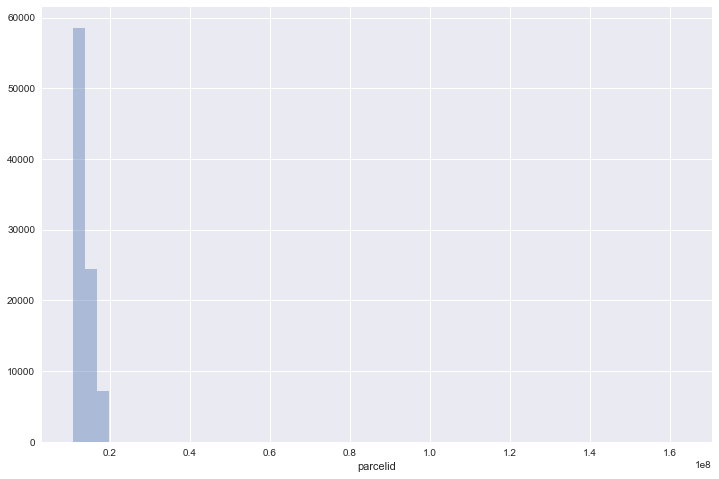

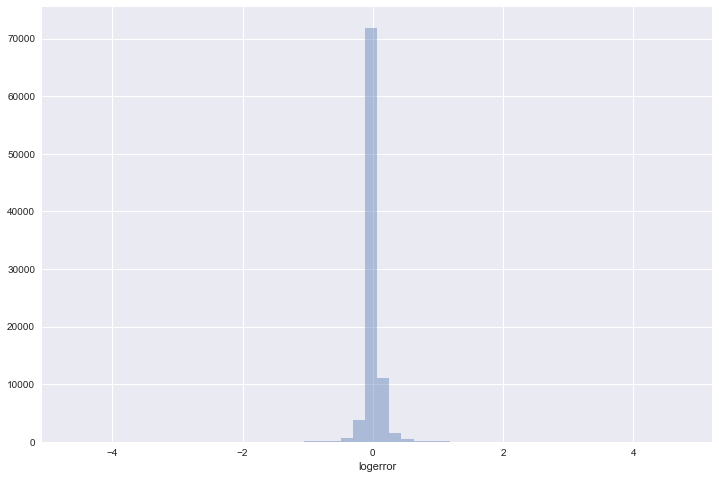

Cant visualize transactiondate
Cant visualize airconditioningtypeid
Cant visualize architecturalstyletypeid
Cant visualize basementsqft


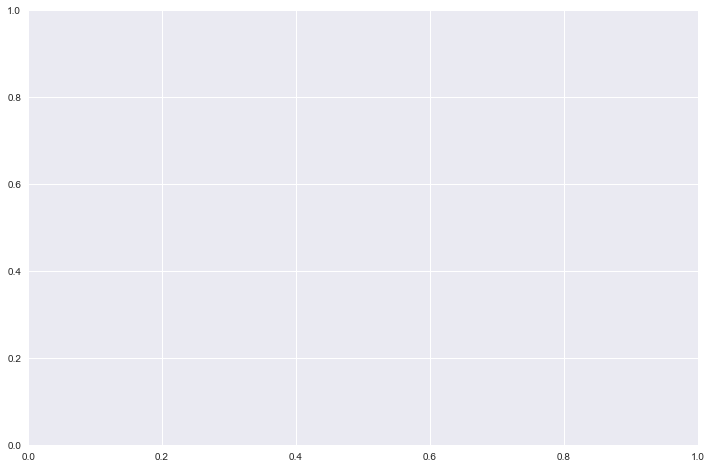

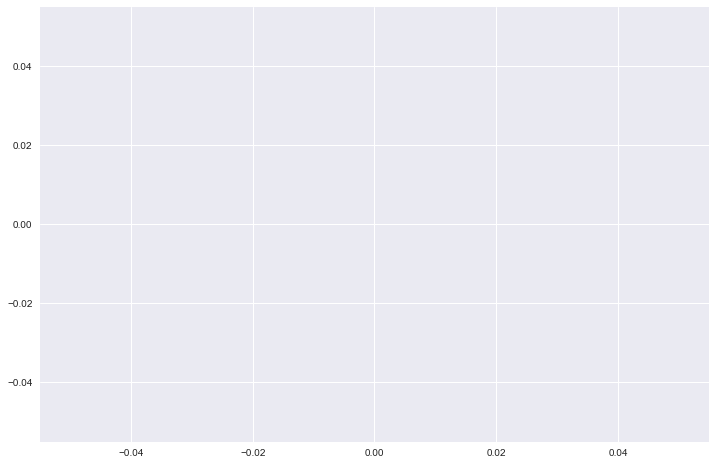

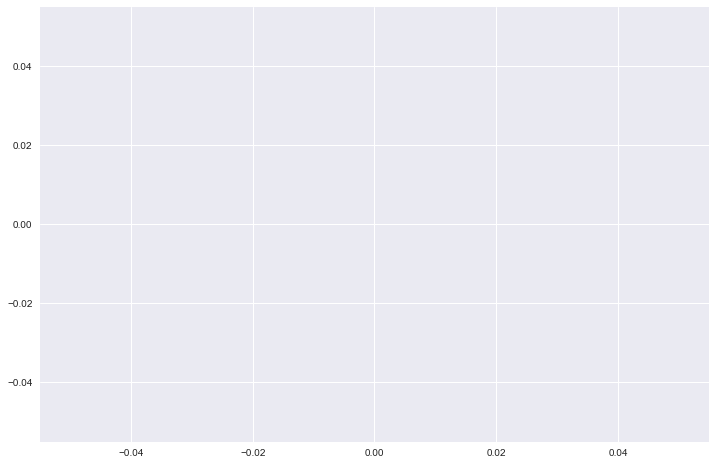

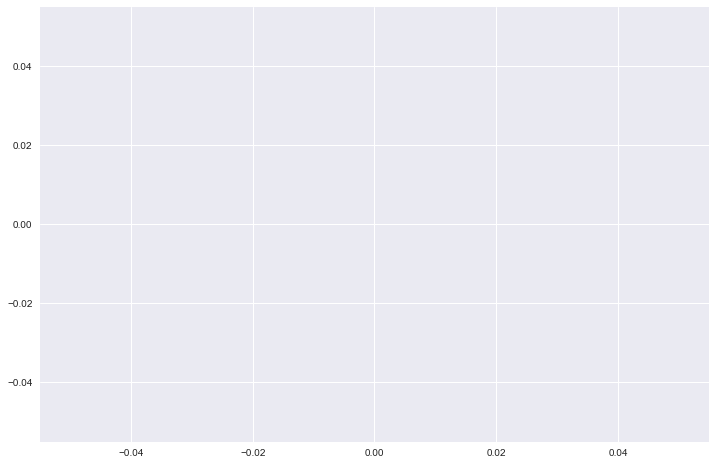

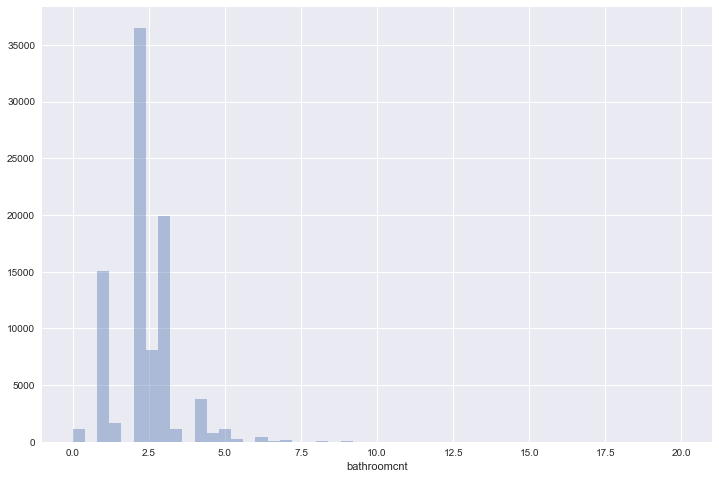

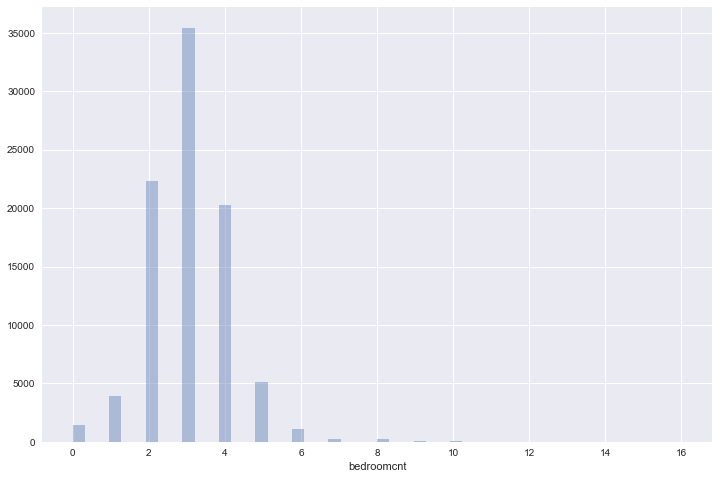

Cant visualize buildingclasstypeid
Cant visualize buildingqualitytypeid
Cant visualize calculatedbathnbr
Cant visualize decktypeid
Cant visualize finishedfloor1squarefeet
Cant visualize calculatedfinishedsquarefeet
Cant visualize finishedsquarefeet12
Cant visualize finishedsquarefeet13
Cant visualize finishedsquarefeet15
Cant visualize finishedsquarefeet50
Cant visualize finishedsquarefeet6


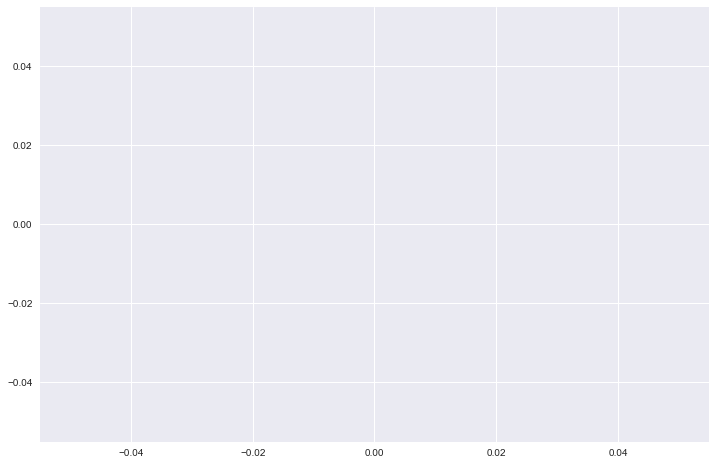

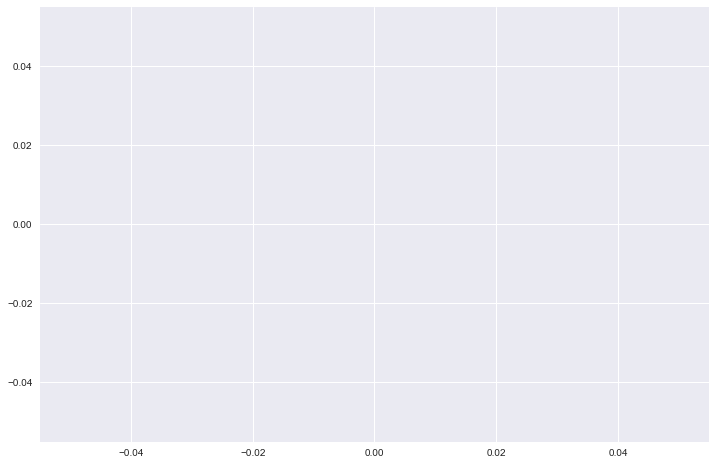

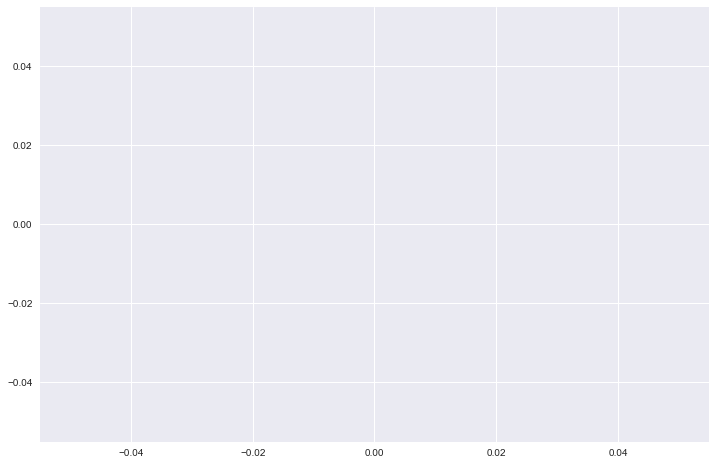

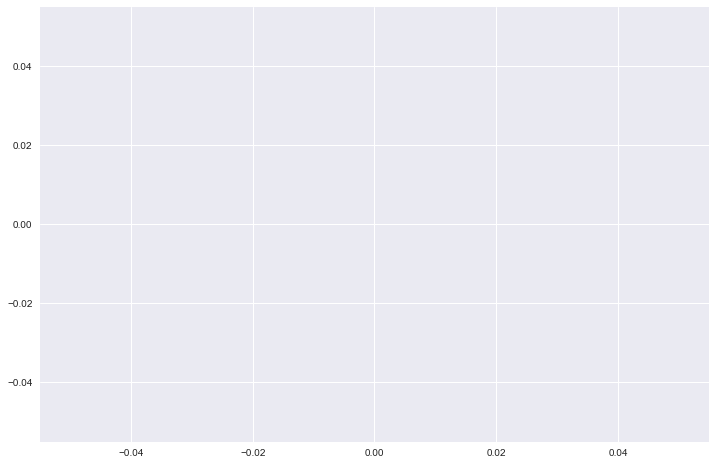

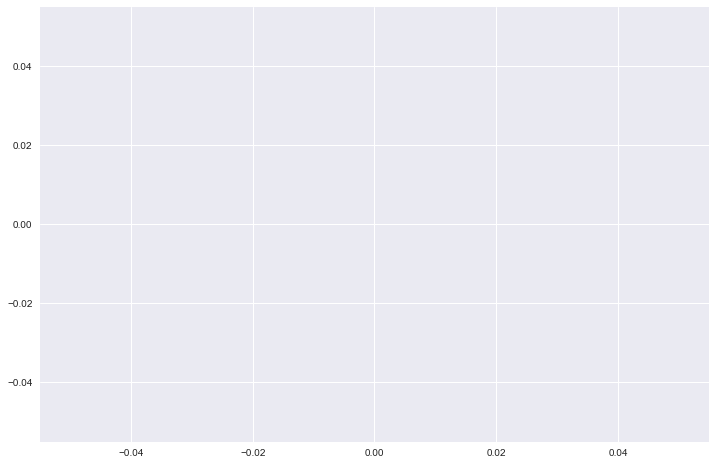

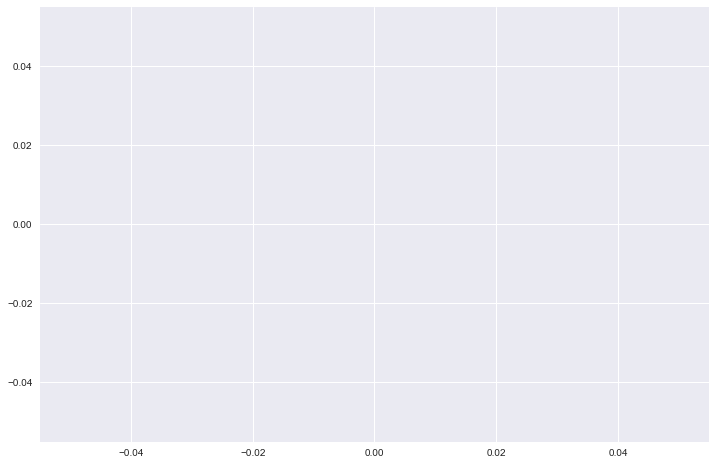

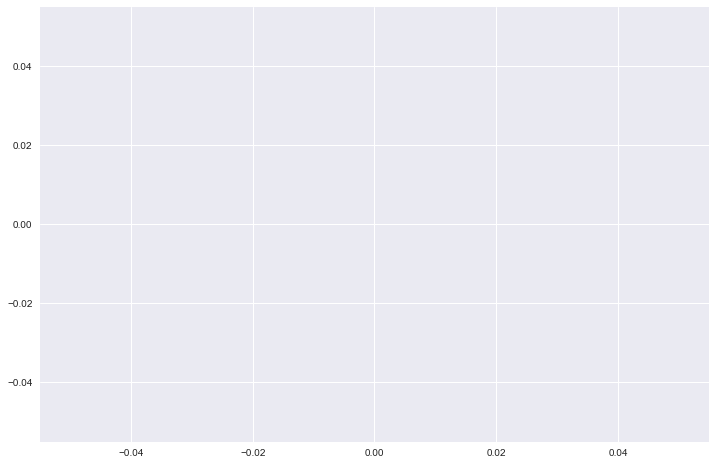

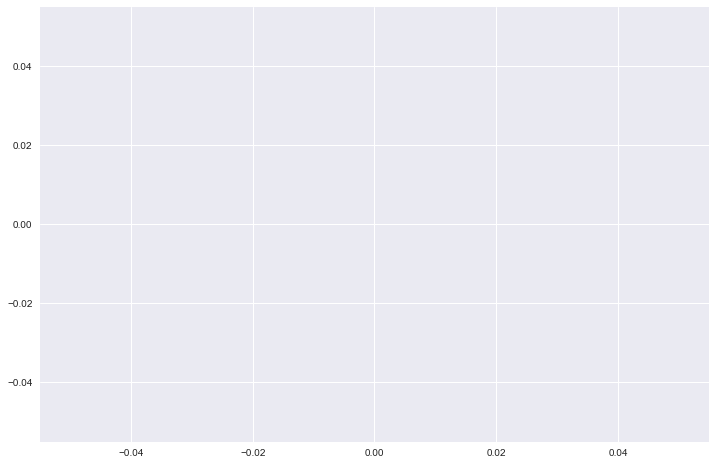

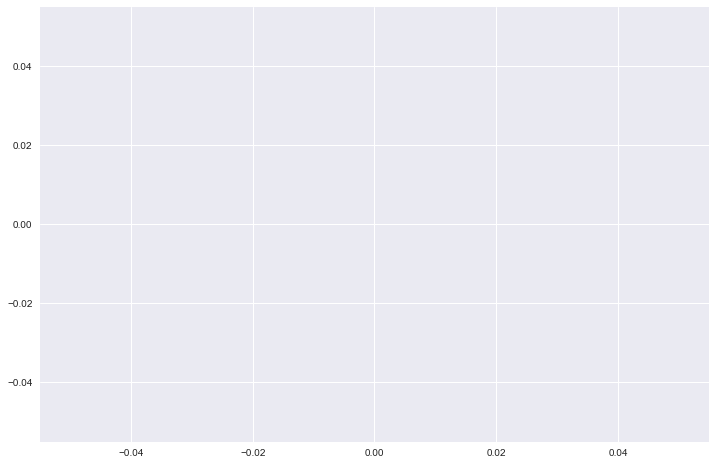

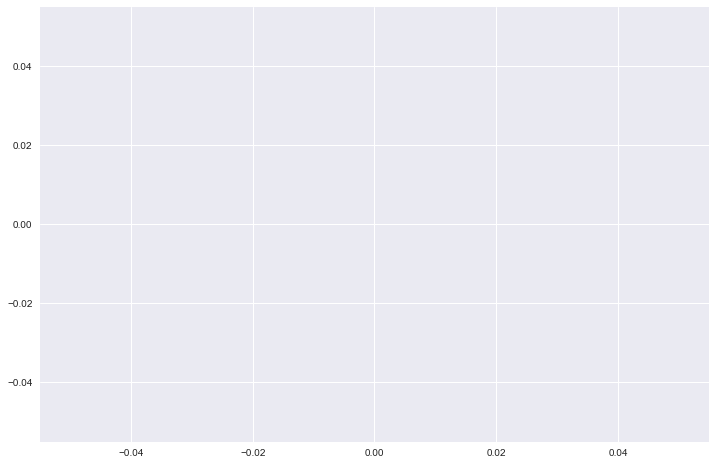

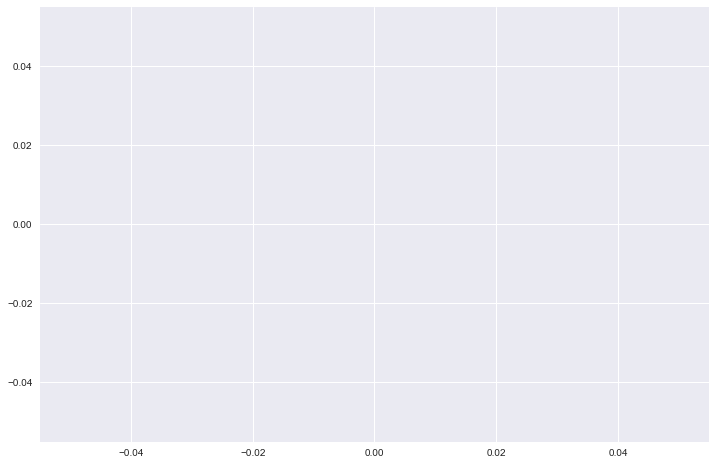

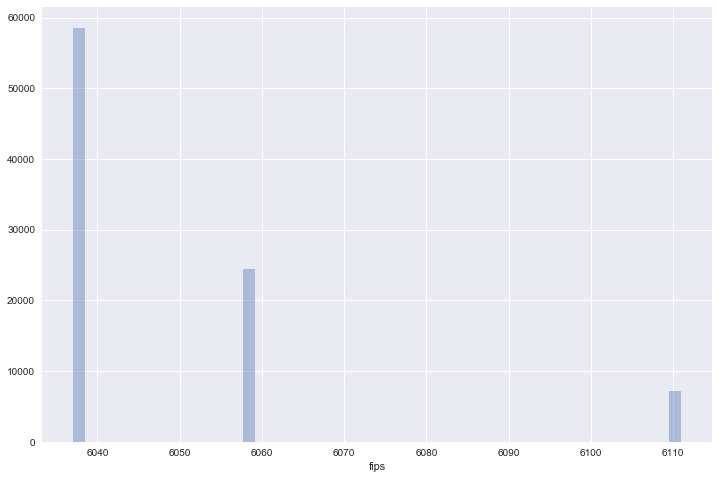

Cant visualize fireplacecnt
Cant visualize fullbathcnt
Cant visualize garagecarcnt
Cant visualize garagetotalsqft
Cant visualize hashottuborspa
Cant visualize heatingorsystemtypeid


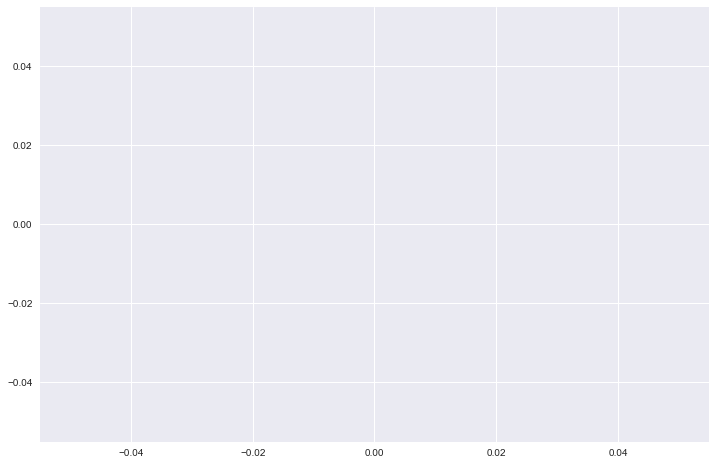

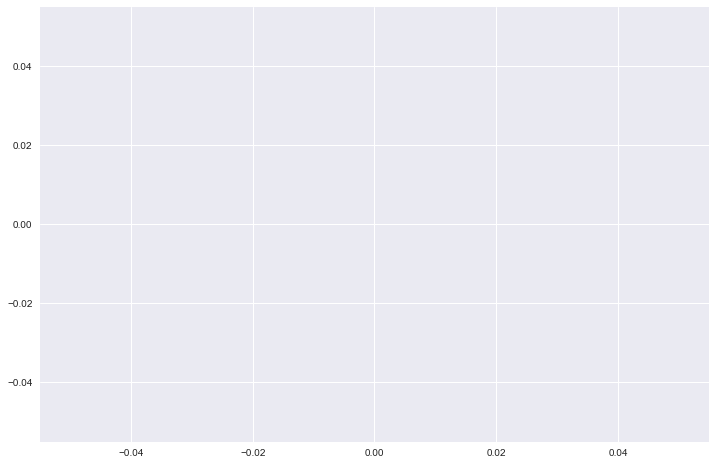

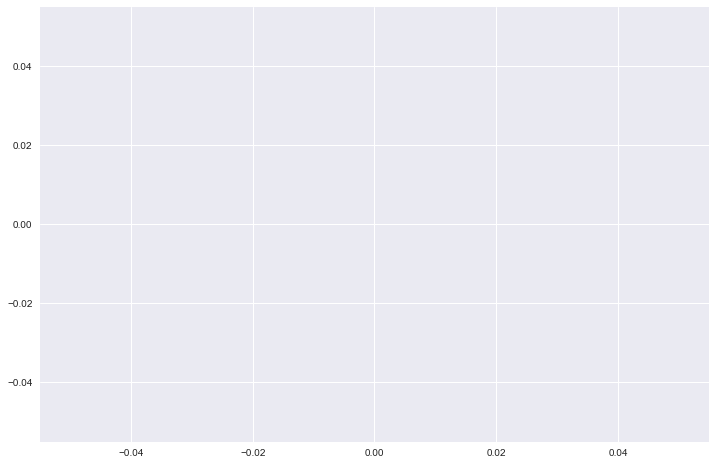

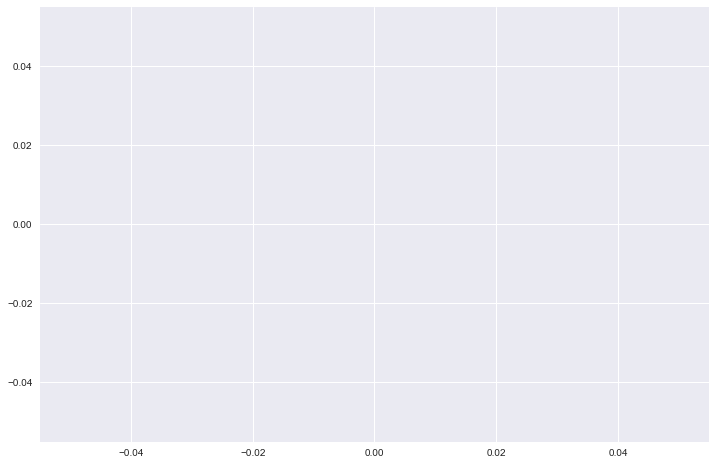

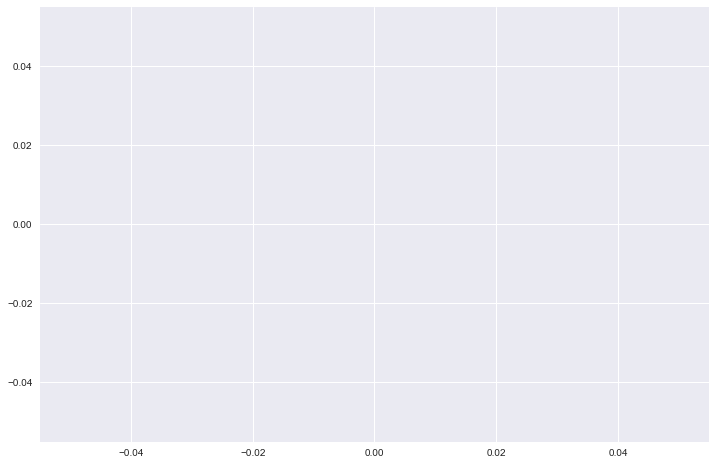

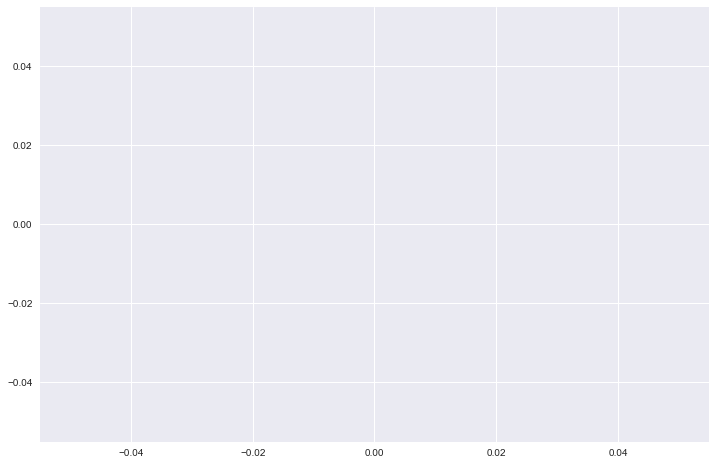

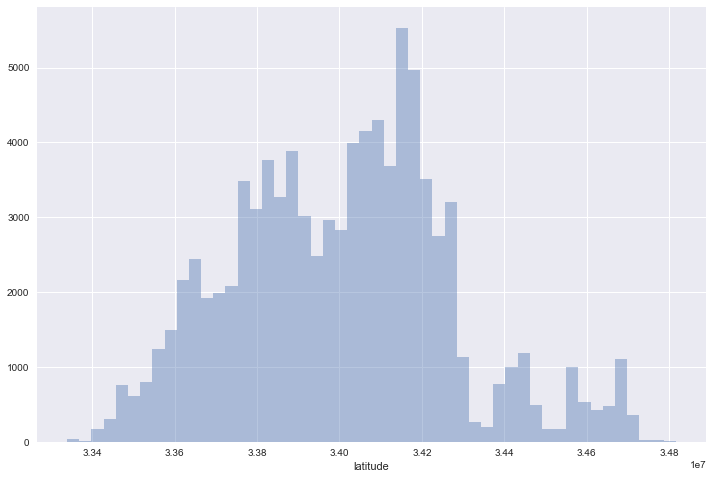

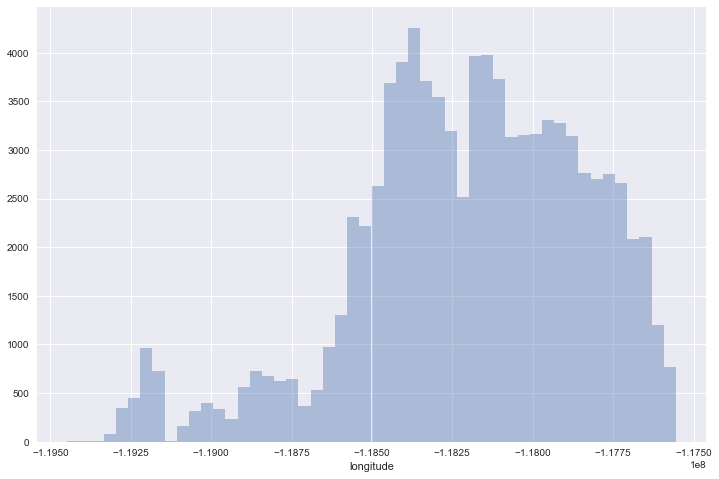

Cant visualize lotsizesquarefeet
Cant visualize poolcnt
Cant visualize poolsizesum
Cant visualize pooltypeid10
Cant visualize pooltypeid2
Cant visualize pooltypeid7
Cant visualize propertycountylandusecode


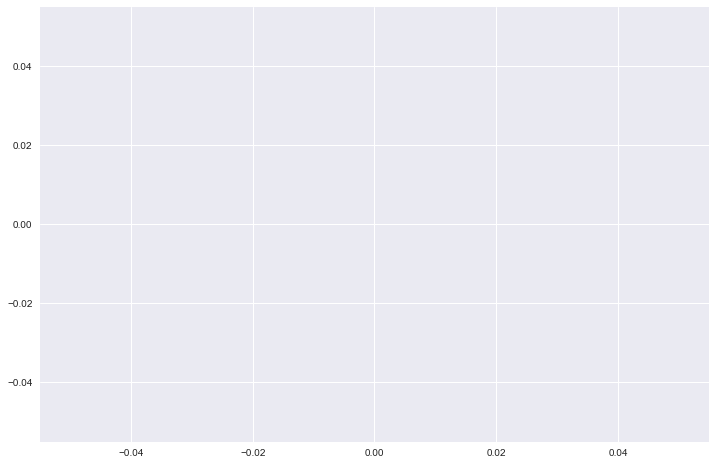

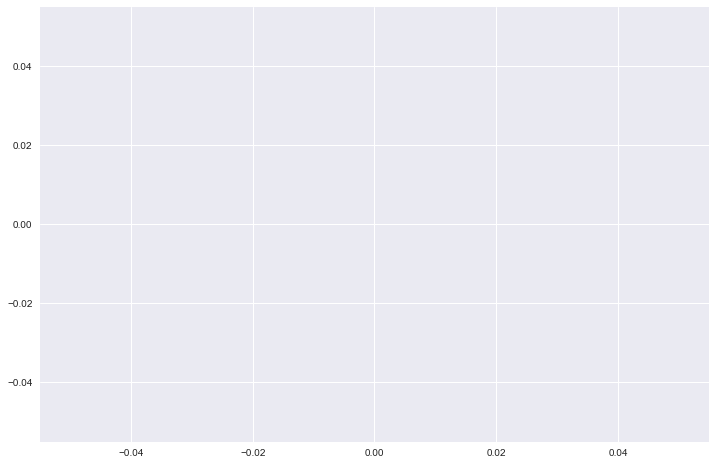

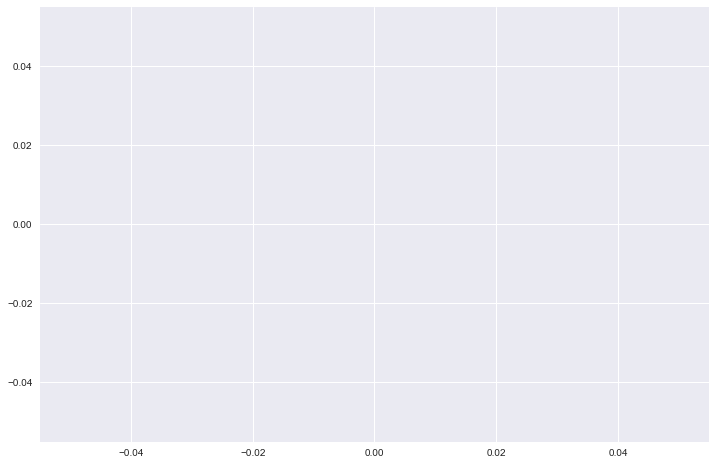

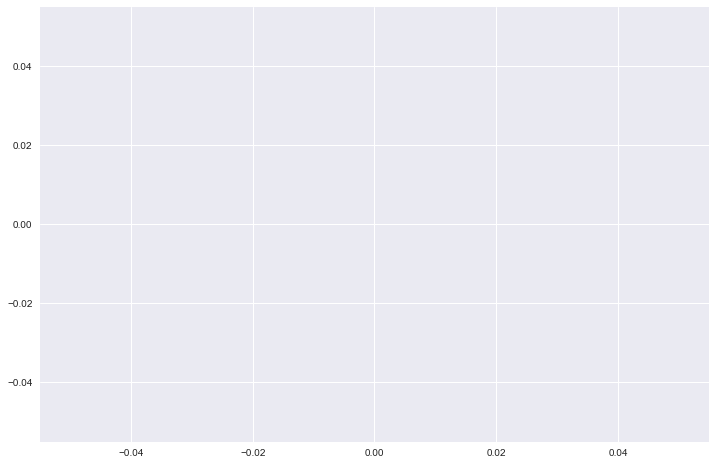

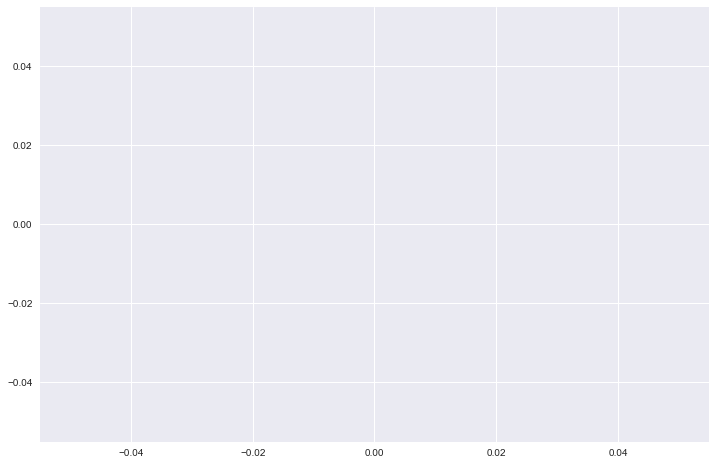

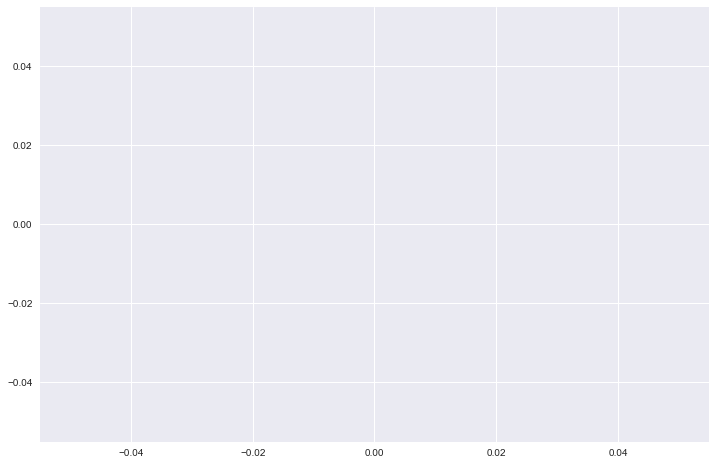

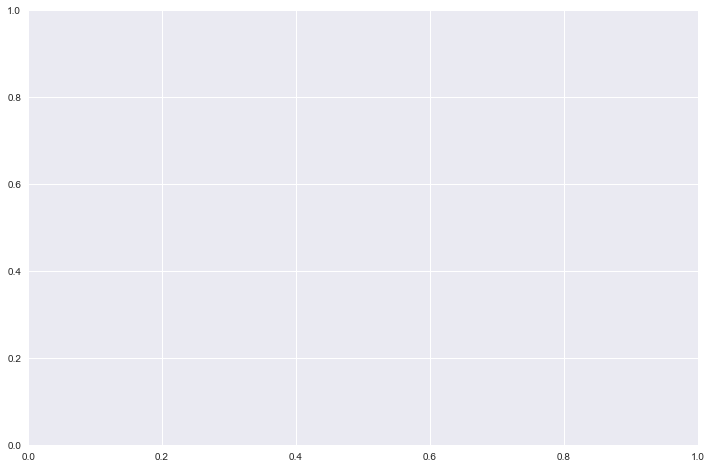

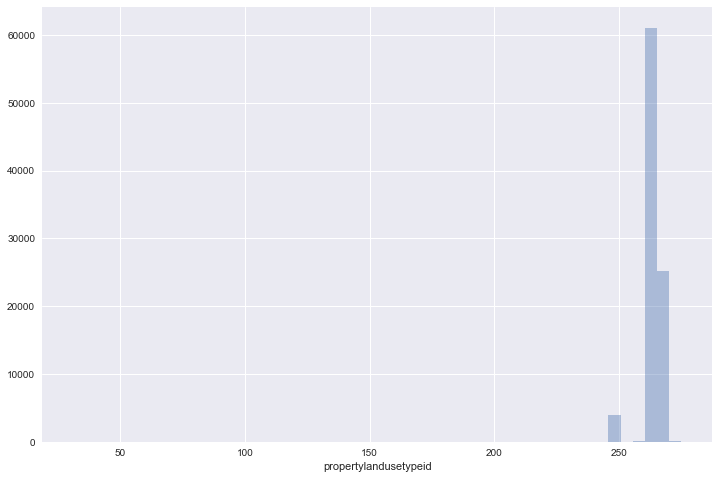

Cant visualize propertyzoningdesc


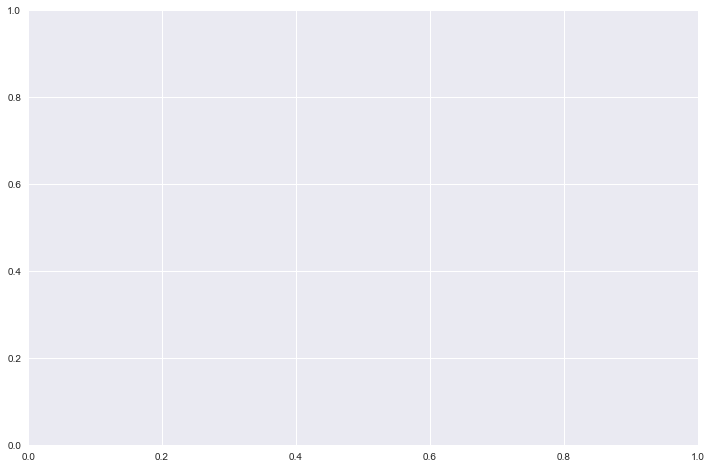

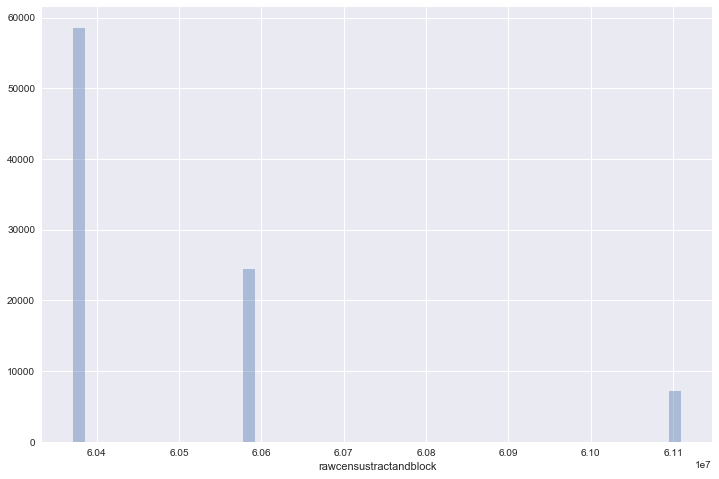

Cant visualize regionidcity


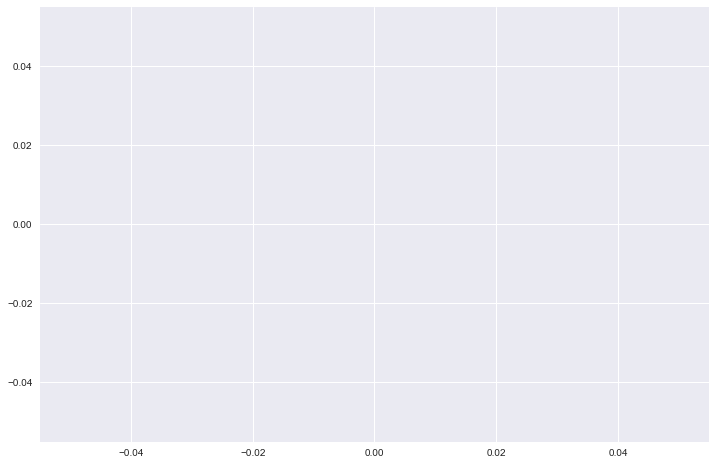

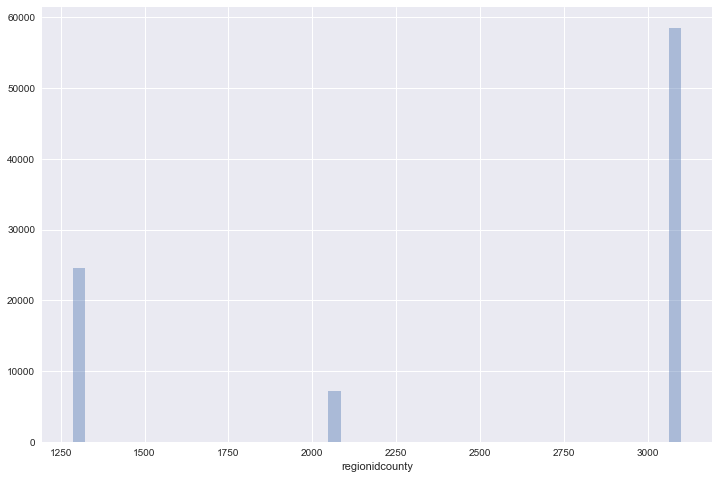

Cant visualize regionidneighborhood
Cant visualize regionidzip


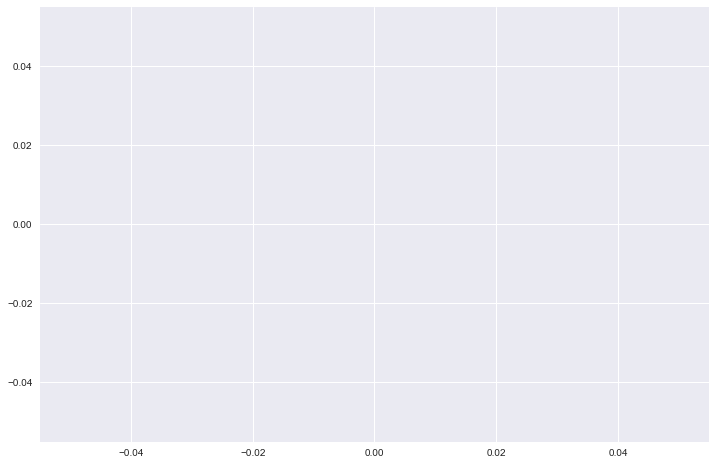

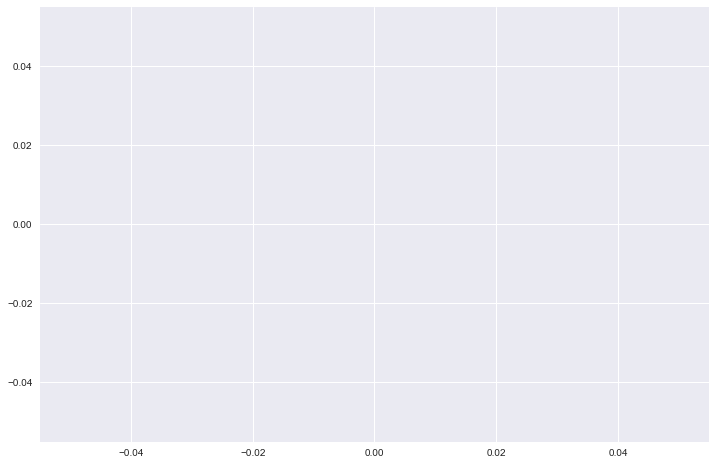

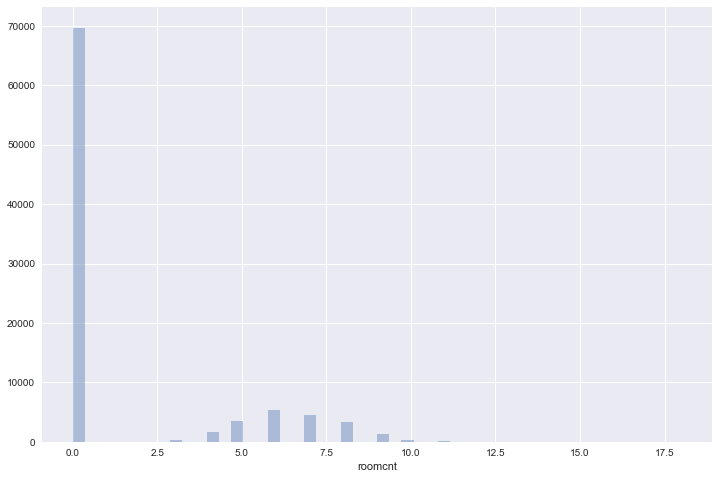

Cant visualize storytypeid
Cant visualize threequarterbathnbr
Cant visualize typeconstructiontypeid
Cant visualize unitcnt
Cant visualize yardbuildingsqft17
Cant visualize yardbuildingsqft26
Cant visualize yearbuilt
Cant visualize numberofstories
Cant visualize fireplaceflag
Cant visualize structuretaxvaluedollarcnt
Cant visualize taxvaluedollarcnt


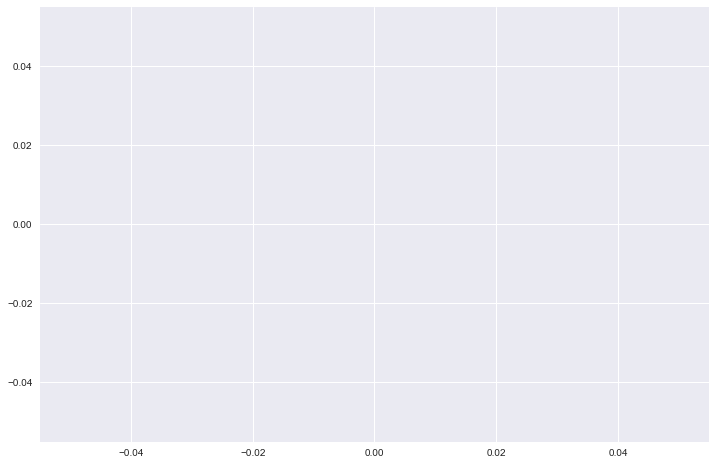

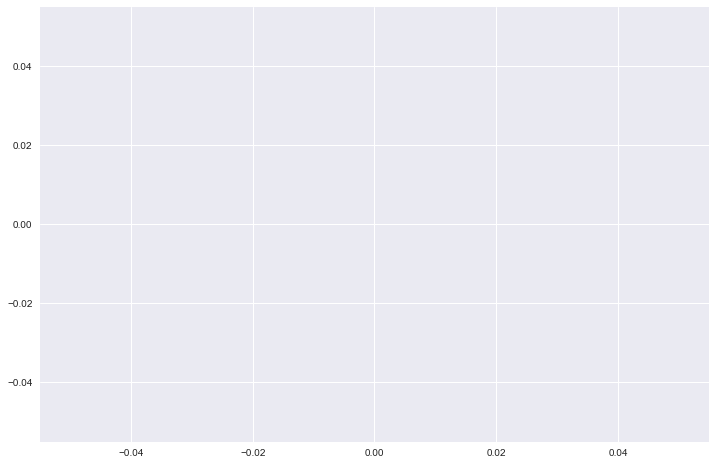

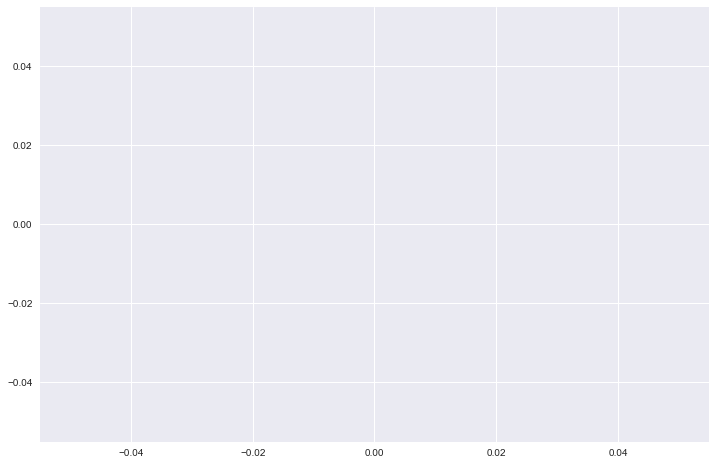

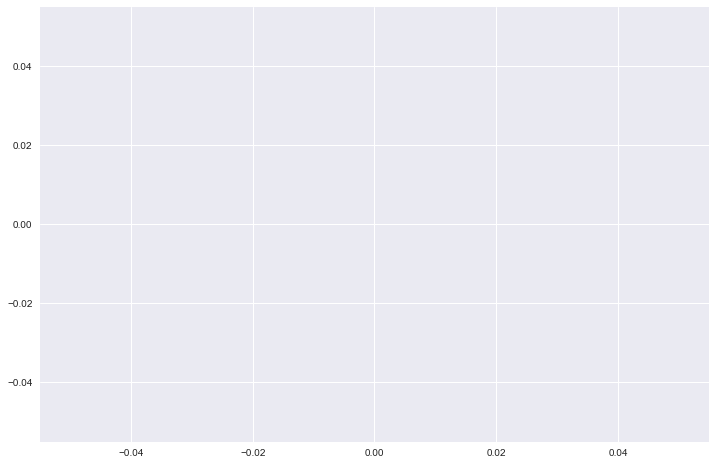

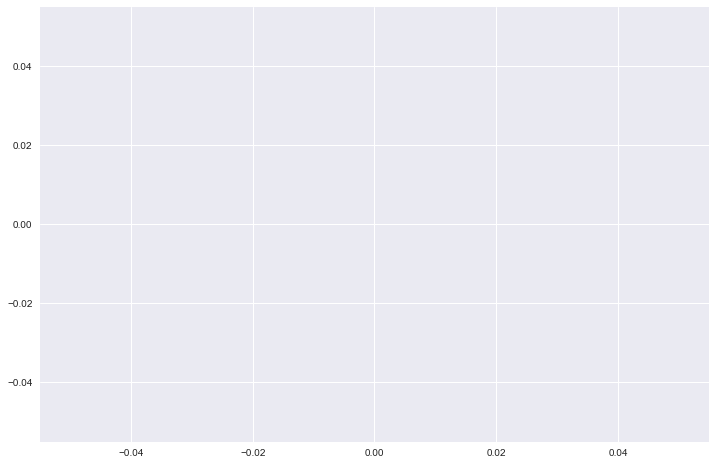

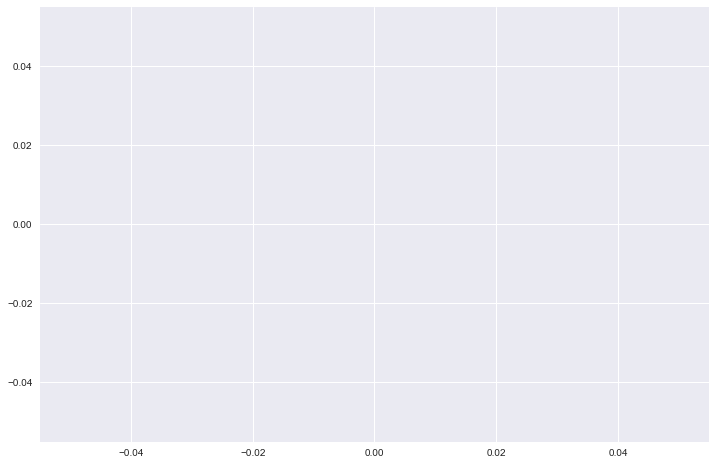

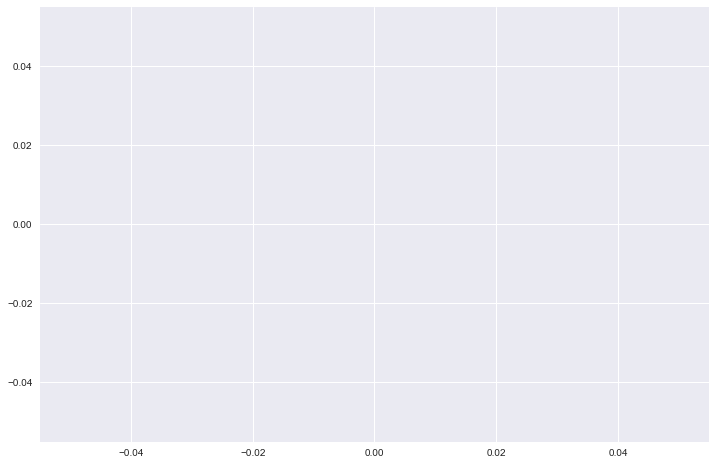

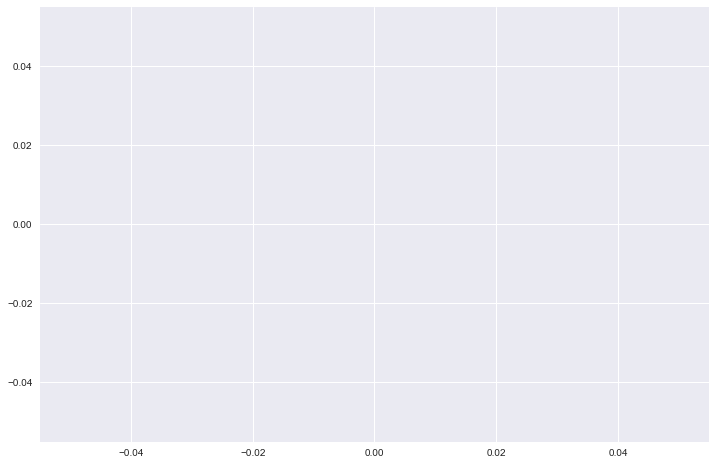

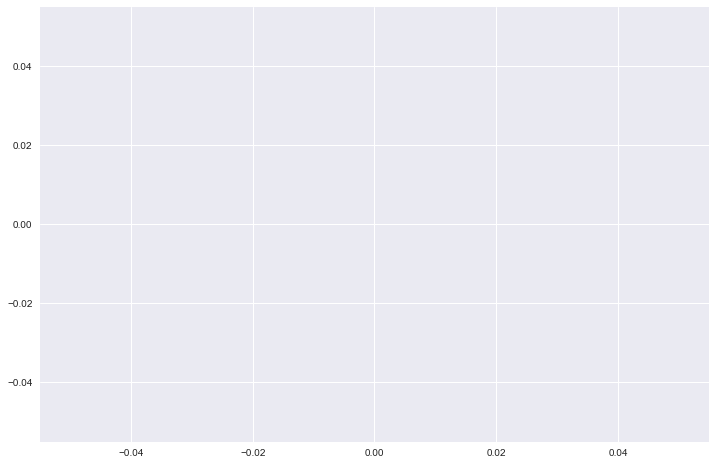

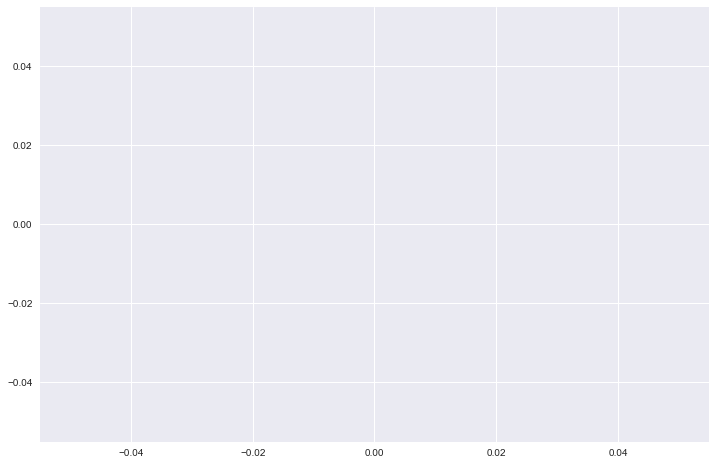

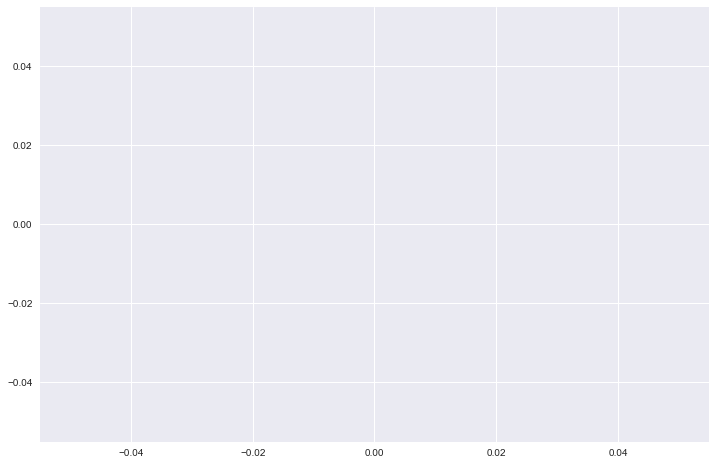

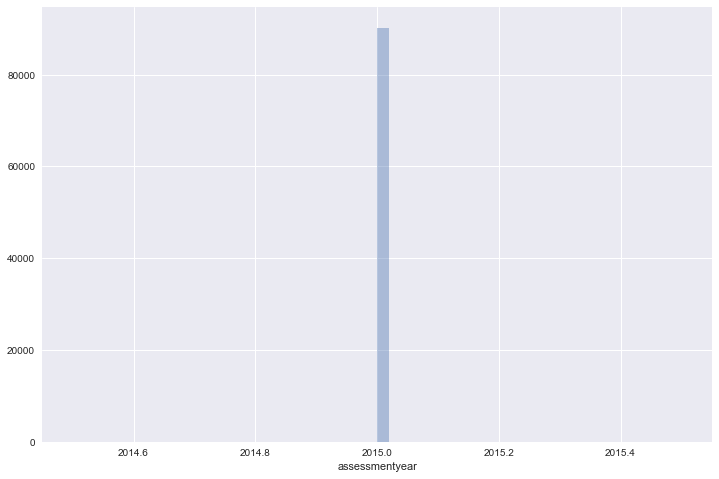

Cant visualize landtaxvaluedollarcnt
Cant visualize taxamount
Cant visualize taxdelinquencyflag
Cant visualize taxdelinquencyyear
Cant visualize censustractandblock


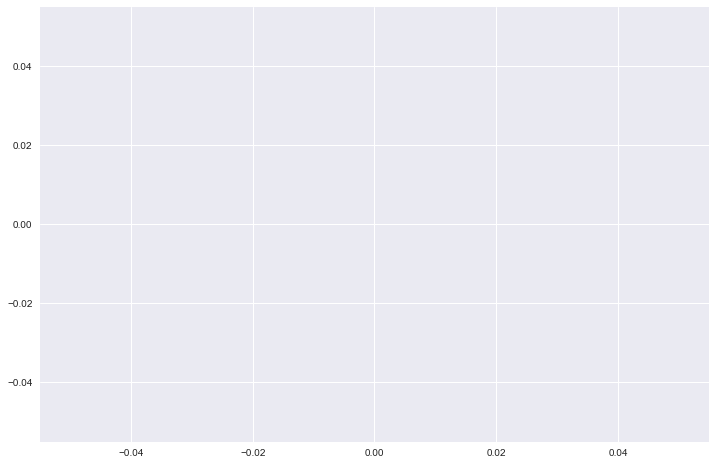

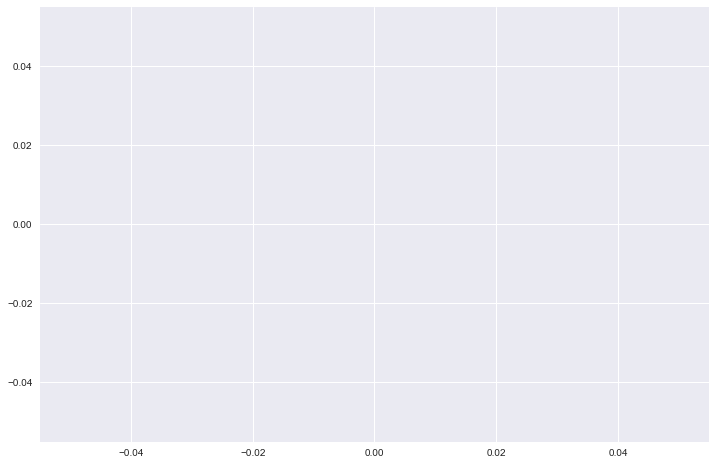

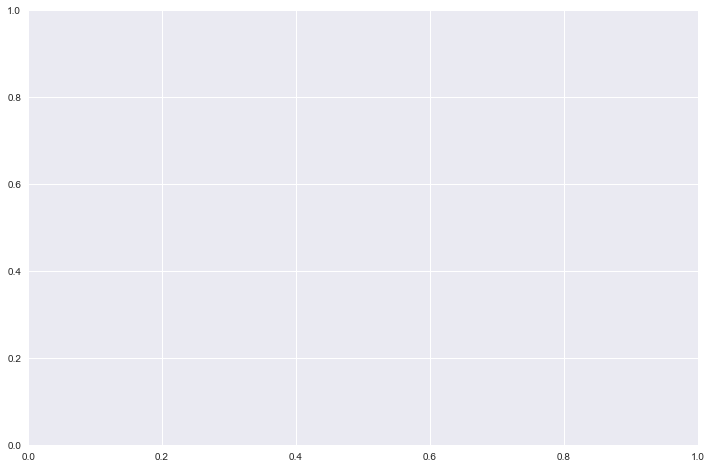

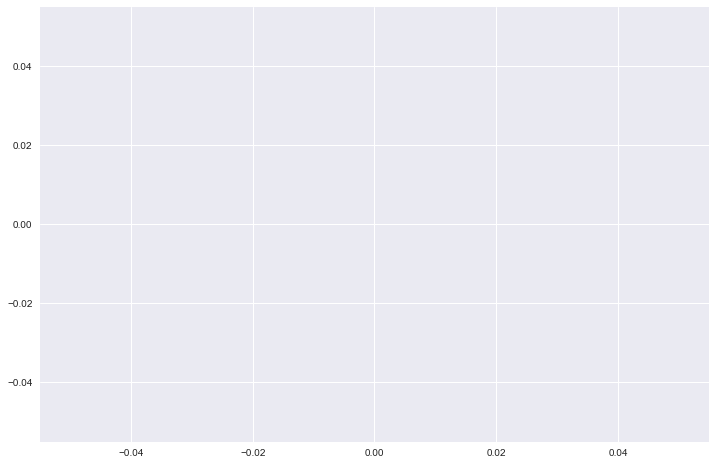

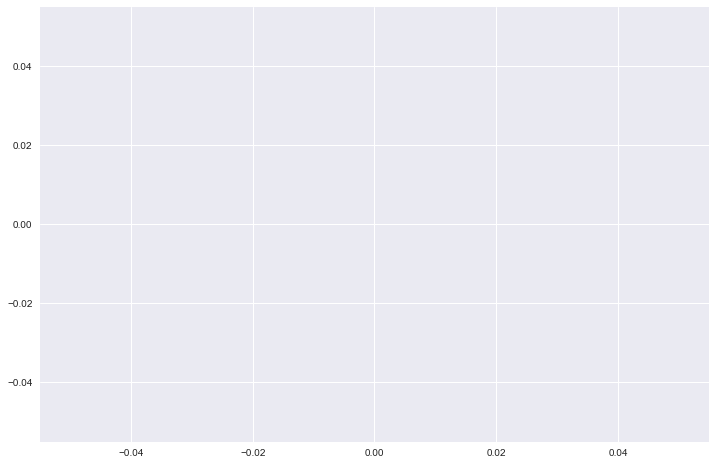

In [67]:
for i in range(len(train_df.columns)):
    plt.figure(figsize=(12,8))
    type(train_df.iloc[:,i])
    try:
        sns.distplot(train_df.iloc[:,i], bins=50, kde=False)
        plt.show()
    except:
        print("Cant visualize %s" %train_df.columns[i])